In [1]:
from IPython.display import YouTubeVideo

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12, 10)
%matplotlib inline

In [5]:
import statsmodels.api as sm
import os

In [ ]:
# p = r'C:\Users\david\STATISTIQUES\Introduction to Statistical Learning\data'
# f = os.path.join(p, '', 'wage.csv')
# df_wage = pd.read_csv(f)
# df_wage.head()

In [34]:
cd C:\Users\david\STATISTIQUES\Introduction to Statistical Learning\data

C:\Users\david\STATISTIQUES\Introduction to Statistical Learning\data


In [35]:
pwd

'C:\\Users\\david\\STATISTIQUES\\Introduction to Statistical Learning\\data'

In [36]:
df_wage = pd.read_csv('wage.csv')
df_wage.head()

year  age      sex            maritl      race        education  \
0  2006   18  1. Male  1. Never Married  1. White     1. < HS Grad   
1  2004   24  1. Male  1. Never Married  1. White  4. College Grad   
2  2003   45  1. Male        2. Married  1. White  3. Some College   
3  2003   43  1. Male        2. Married  3. Asian  4. College Grad   
4  2005   50  1. Male       4. Divorced  1. White       2. HS Grad   

               region        jobclass          health health_ins   logwage  \
0  2. Middle Atlantic   1. Industrial       1. <=Good      2. No  4.318063   
1  2. Middle Atlantic  2. Information  2. >=Very Good      2. No  4.255273   
2  2. Middle Atlantic   1. Industrial       1. <=Good     1. Yes  4.875061   
3  2. Middle Atlantic  2. Information  2. >=Very Good     1. Yes  5.041393   
4  2. Middle Atlantic  2. Information       1. <=Good     1. Yes  4.318063   

         wage  
0   75.043154  
1   70.476020  
2  130.982177  
3  154.685293  
4   75.043154

In [37]:
df_wage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        3000 non-null   int64  
 1   age         3000 non-null   int64  
 2   sex         3000 non-null   object 
 3   maritl      3000 non-null   object 
 4   race        3000 non-null   object 
 5   education   3000 non-null   object 
 6   region      3000 non-null   object 
 7   jobclass    3000 non-null   object 
 8   health      3000 non-null   object 
 9   health_ins  3000 non-null   object 
 10  logwage     3000 non-null   float64
 11  wage        3000 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 281.4+ KB


In [38]:
for col in df_wage.select_dtypes('object'):
    print(f'{col} : {df_wage[col].unique()}\n')

sex : ['1. Male']

maritl : ['1. Never Married' '2. Married' '4. Divorced' '3. Widowed' '5. Separated']

race : ['1. White' '3. Asian' '4. Other' '2. Black']

education : ['1. < HS Grad' '4. College Grad' '3. Some College' '2. HS Grad'
 '5. Advanced Degree']

region : ['2. Middle Atlantic']

jobclass : ['1. Industrial' '2. Information']

health : ['1. <=Good' '2. >=Very Good']

health_ins : ['2. No' '1. Yes']



In [39]:
df_wage.describe(include = ['object'])

sex      maritl      race   education              region  \
count      3000        3000      3000        3000                3000   
unique        1           5         4           5                   1   
top     1. Male  2. Married  1. White  2. HS Grad  2. Middle Atlantic   
freq       3000        2074      2480         971                3000   

             jobclass          health health_ins  
count            3000            3000       3000  
unique              2               2          2  
top     1. Industrial  2. >=Very Good     1. Yes  
freq             1544            2142       2083

In [40]:
df_wage.isna().sum()

year          0
age           0
sex           0
maritl        0
race          0
education     0
region        0
jobclass      0
health        0
health_ins    0
logwage       0
wage          0
dtype: int64

In [41]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [2]:
plt.style.use('fivethirtyeight')

In [43]:
df_wage.columns

Index(['year', 'age', 'sex', 'maritl', 'race', 'education', 'region',
       'jobclass', 'health', 'health_ins', 'logwage', 'wage'],
      dtype='object')

In [44]:
z = []
for age, wage in zip(df_wage.age, df_wage.wage):
    z.append((age, wage))
z = sorted(z)

In [45]:
from itertools import groupby

z2, z3 = [], []
for key, group in groupby(z, lambda x: x[0]):
    z2.append(list(group))
    z3.append(key)

In [46]:
ss = []
for i in range(len(z2)):
    s = 0
    for j in range(len(z2[i])):
        s += z2[i][j][1]
    ss.append(s / len(z2[i]))

In [47]:
def mean_two_variables(var1, var2):
    from itertools import groupby
    z = sorted([(age, wage) for age, wage in zip(var1, var2)])
    z2, z3 = [], []
    for key, group in groupby(z, lambda x: x[0]):
        z2.append(list(group))
        z3.append(key)
    ss = []
    for i in range(len(z2)):
        s = 0
        for j in range(len(z2[i])):
            s += z2[i][j][1]
        ss.append(s / len(z2[i]))
    return np.array(z3), np.array(ss)

In [48]:
age, wage = mean_two_variables(df_wage.age, df_wage.wage)

In [50]:
df_wage.groupby('age')['wage'].mean()

age
18     64.493063
19     53.990486
20     69.033341
21     75.906952
22     72.251667
         ...    
74    106.192881
75     69.389644
76    109.219665
77     99.689464
80     86.147071
Name: wage, Length: 61, dtype: float64

<AxesSubplot:xlabel='age'>

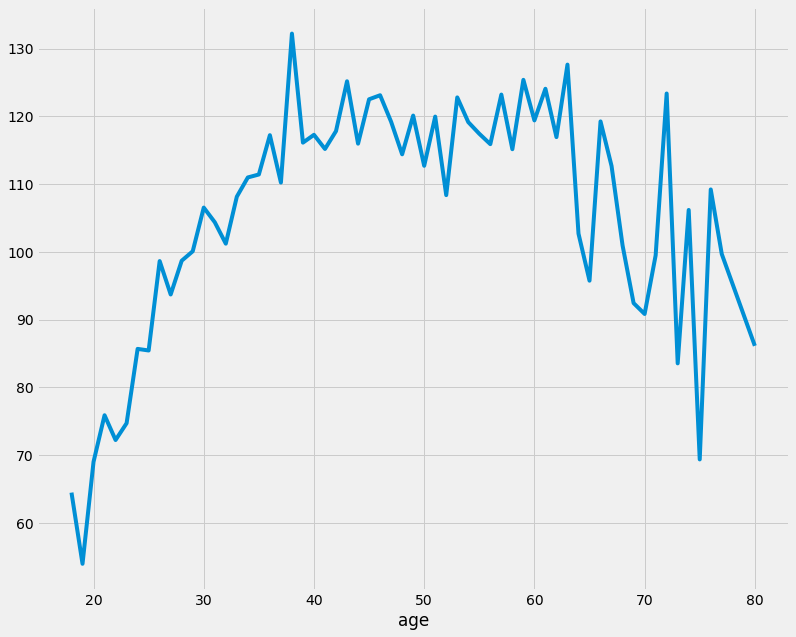

In [19]:
plt.figure(figsize = (12, 10))
df_wage.groupby('age')['wage'].mean().plot()

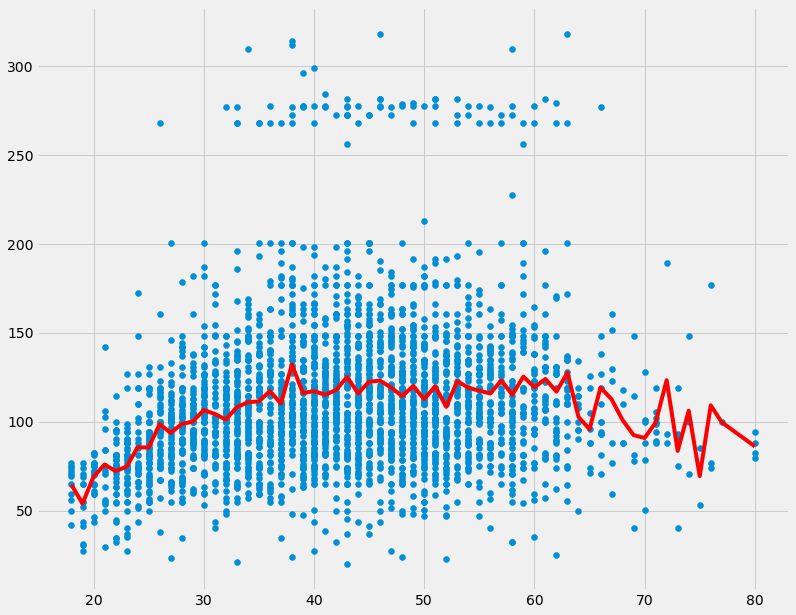

In [20]:
plt.figure(figsize = (12, 10))
plt.scatter(df_wage['age'], df_wage.wage)
plt.plot(age, wage, c = 'r')

In [21]:
df_edu = df_wage.pivot(columns='education', values='wage')
df_edu.head()

education  1. < HS Grad  2. HS Grad  3. Some College  4. College Grad  \
0             75.043154         NaN              NaN              NaN   
1                   NaN         NaN              NaN        70.476020   
2                   NaN         NaN       130.982177              NaN   
3                   NaN         NaN              NaN       154.685293   
4                   NaN   75.043154              NaN              NaN   

education  5. Advanced Degree  
0                         NaN  
1                         NaN  
2                         NaN  
3                         NaN  
4                         NaN

### Avec statmodels

<AxesSubplot:xlabel='year'>

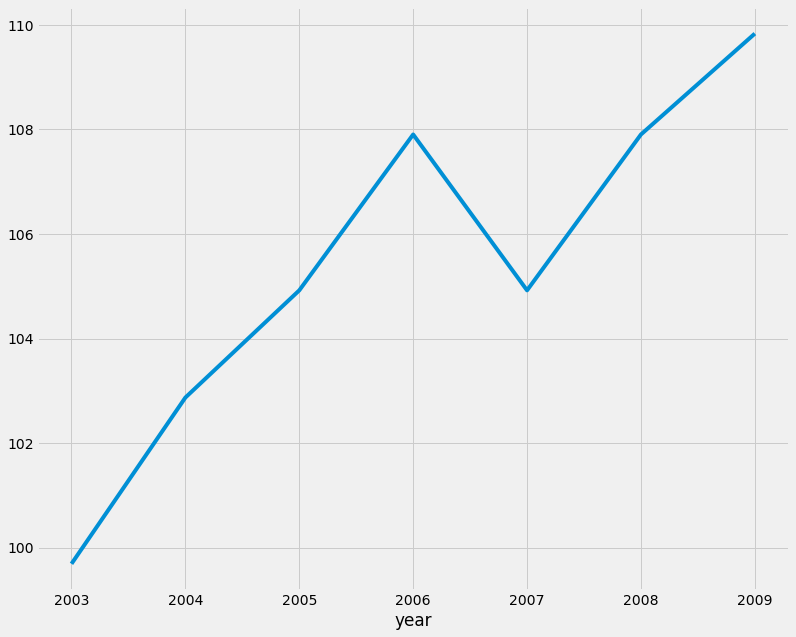

In [22]:
plt.figure(figsize = (12, 10))
df_wage.groupby('year')['wage'].median().plot()

In [23]:
import statsmodels.api as sm
from matplotlib import cm

In [10]:
plt.style.use("ggplot")

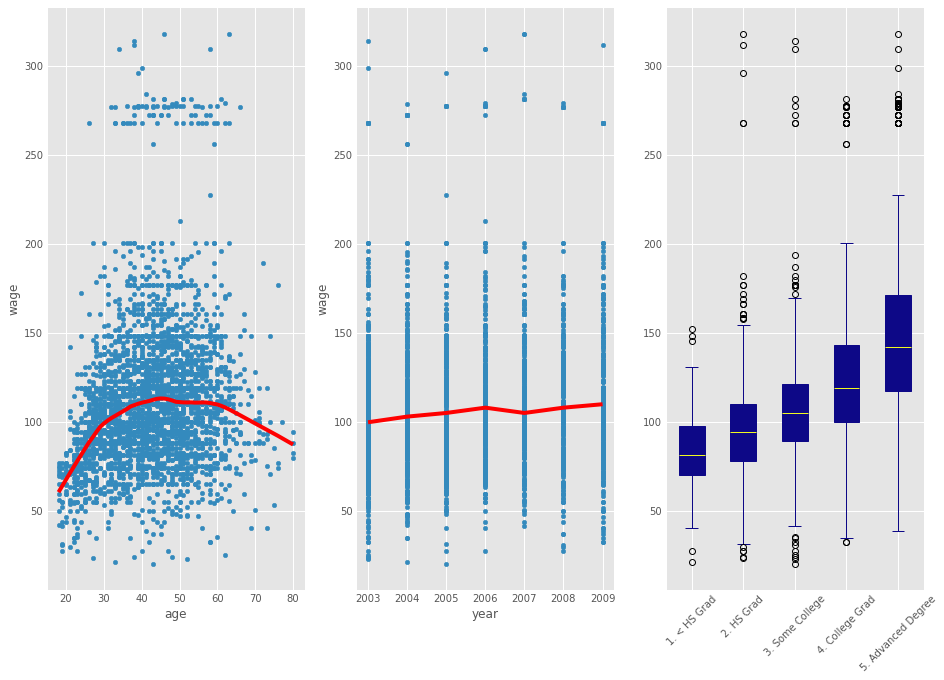

In [31]:
fig, ax = plt.subplots(1, 3, figsize = (14, 10))

# 1ER GRAPH
df_wage.plot.scatter('age', 'wage', ax = ax[0])

#lowess permet de lisser les valeurs du 1er parametre
# age = 18   ====> lowess(wage) = 58.48
# age = 19   ====> lowess(wage) = 62.33 ect...
lowess = sm.nonparametric.lowess(df_wage.wage, df_wage.age, frac = 0.3)
ax[0].plot(lowess[:, 0], lowess[:, 1], c = 'r')

# 2ND GRAPH
df_wage.plot.scatter('year', 'wage', ax = ax[1])

# regroupe l'age par le salaire median
year_median = df_wage.groupby('year')['wage'].median()
ax[1].plot(year_median, c='r')

# 3E GRAPH 
df_edu = df_wage.pivot(columns='education', values='wage')
''
boxplot = df_edu.plot.box(ax=ax[2], rot=45, patch_artist=True, colormap = 'plasma')
colors = ['lightblue', 'green', 'yellow', 'blue', 'red']
for artist, color in zip(boxplot.artists, colors):
    artist.set_facecolor(color)

### With seaborn

In [83]:
import seaborn as sns
sns.set(rc={'figure.figsize':(12,10)})

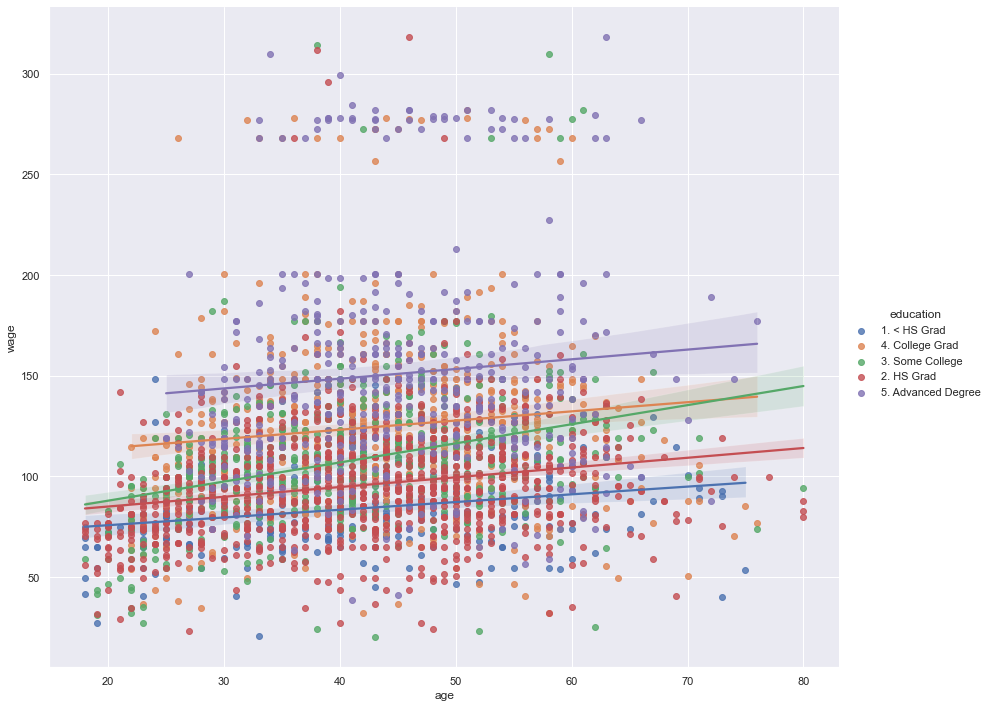

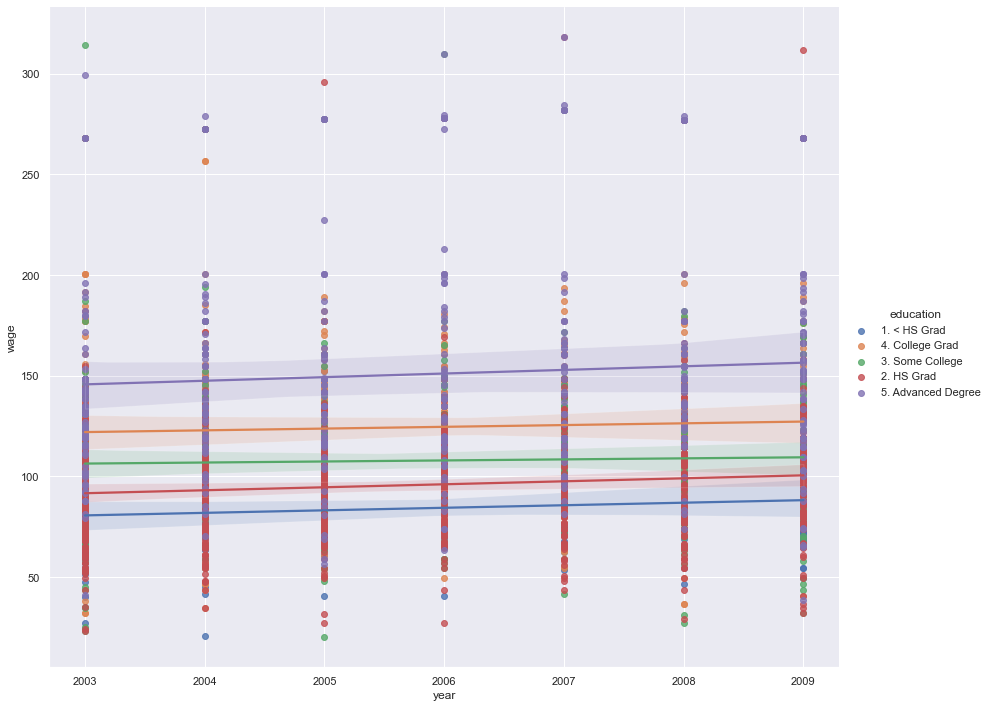

In [255]:
sns.lmplot(x = 'age', y = 'wage', data = df_wage, hue='education', height=10, aspect=12/10)
sns.lmplot(x = 'year', y = 'wage', data=df_wage, ci=99.99, hue='education', height=10, aspect=12/10)

<AxesSubplot:xlabel='education', ylabel='wage'>

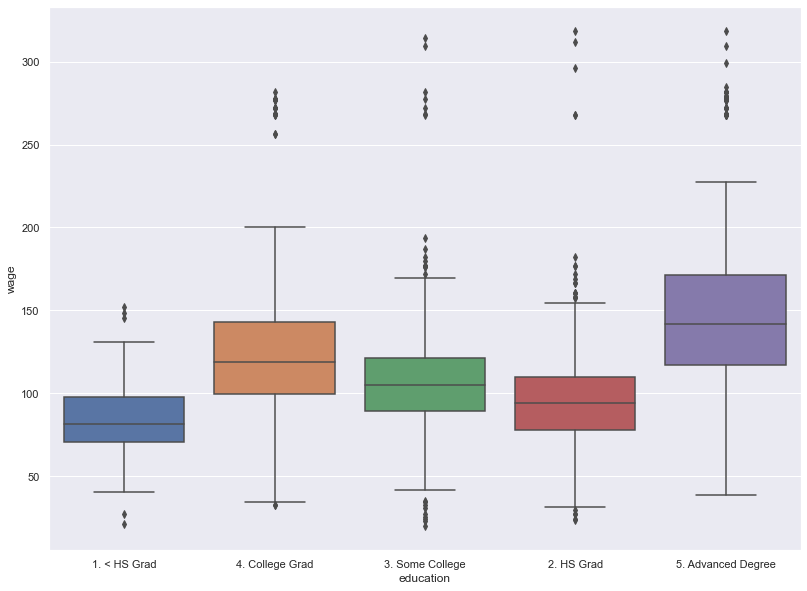

In [256]:
sns.boxplot(x = 'education', y = 'wage', data=df_wage)

In [258]:
df1 = df_wage[['age', 'year', 'education', 'wage']]

df_melt = pd.melt(df1, id_vars=['education', 'wage'])

df_melt.head()

education        wage variable  value
0     1. < HS Grad   75.043154      age     18
1  4. College Grad   70.476020      age     24
2  3. Some College  130.982177      age     45
3  4. College Grad  154.685293      age     43
4       2. HS Grad   75.043154      age     50

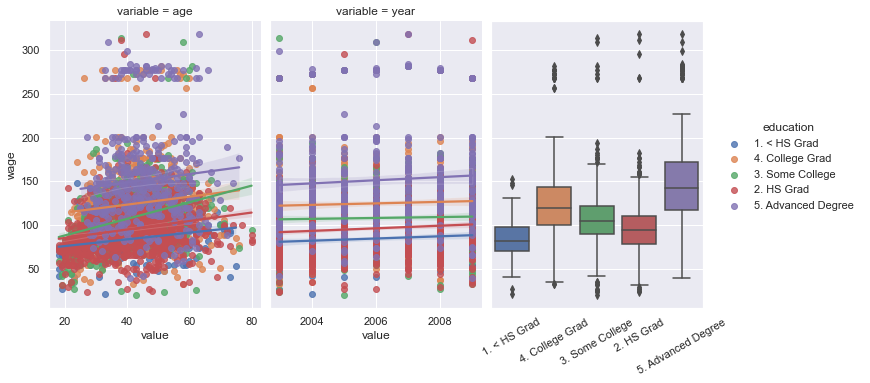

In [264]:
seaborn_grid = sns.lmplot(x = 'value', y = 'wage', col='variable', hue='education', data=df_melt, facet_kws=dict(sharex=False))
seaborn_grid.fig.set_figwidth(8)

left, bottom, width, height = seaborn_grid.fig.axes[0]._position.bounds
left2, bottom2, width2, height2 = seaborn_grid.fig.axes[1]._position.bounds
left_diff = left2 - left
seaborn_grid.fig.add_axes((left2 + left_diff, bottom, width, height))

sns.boxplot(x = 'education', y = 'wage', data=df_wage, ax = seaborn_grid.fig.axes[2])
ax2 = seaborn_grid.fig.axes[2]
ax2.set_yticklabels([])
ax2.set_xticklabels(ax2.get_xmajorticklabels(), rotation=30)
ax2.set_ylabel('')
ax2.set_xlabel('');

leg = seaborn_grid.fig.legends[0]
leg.set_bbox_to_anchor([0, .1, 1.5,1])

## Hypothesis Testing

**H0** :  $A_{mean} = B_{mean}$</br>
**H1** : $A_{mean} != B_{mean}$

### T Test

In [265]:
A = np.random.randint(1, 100, 20)
B = np.random.randint(1, 100, 20)

In [266]:
A_mean = A.mean()
B_mean = B.mean()

A_std = A.std()
B_std = B.std()

In [273]:
A_sample = np.random.choice(A, 5)
B_sample = np.random.choice(B, 5)

In [274]:
A_sample_mean = A_sample.mean()
B_sample_mean = B_sample.mean()

A_sample_std = A_sample.std()
B_sample_std = B_sample.std()

In [282]:
s = np.sqrt(((len(A_sample - 1) * A_sample_std**2) + (len(B_sample - 1) * B_sample_std**2)) / (len(A_sample) + len(B_sample) - 2))

In [283]:
s

30.21919919521363

In [284]:
T = (A_sample_mean - B_sample_mean) / (s * np.sqrt((1 / len(A_sample)) + (1 / len(B_sample))))

In [285]:
T

1.3080581817126904

In [279]:
import scipy.stats

In [280]:
scipy.stats.ttest_ind(A_sample, B_sample)

Ttest_indResult(statistic=1.3080581817126904, pvalue=0.2271855975870546)

In [286]:
A_mean - B_mean, A_sample_mean - B_sample_mean

(10.850000000000001, 25.0)

## Exercices

### Exerice 1

A matrice de taille `n x p`

<b>1-a</b>

si n est trés grand et p trés petit, le modèle est trés flexible (complexité trop élevée qui prend aussi en compte le bruit du phénomène. C'est en fait ce qui arrive aux méthodes à haute variance)

un échantillon de grande taille signifie qu'un modèle flexible pourra mieux s'adapter aux données

le grand nombre d'observations empêcherait le modèle de suivre la valeur aberrante/le bruit.</br>
Le nombre de prédicteurs étant petit aiderait également avec le modèle

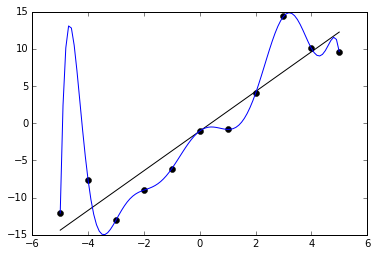

<b>1-b</b>

si n est petit et p est grand, un modèle flexible serait probablement surajusté.</br> Les modèles flexibles fonctionnent généralement mieux lorsque de grands ensembles de données sont disponibles

Avec un très grand nombre de variables, il est possible d'obtenir un faible biais.</br>
Un faible nombre d'observations introduirait beaucoup de variance car le caractère aléatoire serait très facilement détecté comme un signal.

<b>1-c</b>

si la relation entre les samples et les variables sont non-linéaire, cad qu'il y a beaucoup de variables, les modèles flexibles fonctionnent mieux sur les ensembles de données non linéaires car elles ont plus de degrés de liberté pour approximer une relation non linéaire

Un modèle inflexible par définition ne peut pas modéliser des relations complexes

<b>1-d</b>

si il y a une grande variance, un modèle flexible serait probablement surajusté, en raison d'un ajustement plus précis du bruit dans les termes d'erreur qu'une méthode inflexible.</br>
En d'autres termes, les points de données seront éloignés de $f$ (fonction idéale pour décrire les données) si la variance des termes d'erreur est très élevée.</br>
Cela laisse entendre que f est linéaire et qu'un modèle plus simple serait donc mieux en mesure d'estimer $f$

les modèles flexibles suivent le bruit et comme le bruit est élevé, ce ne serait pas idéal

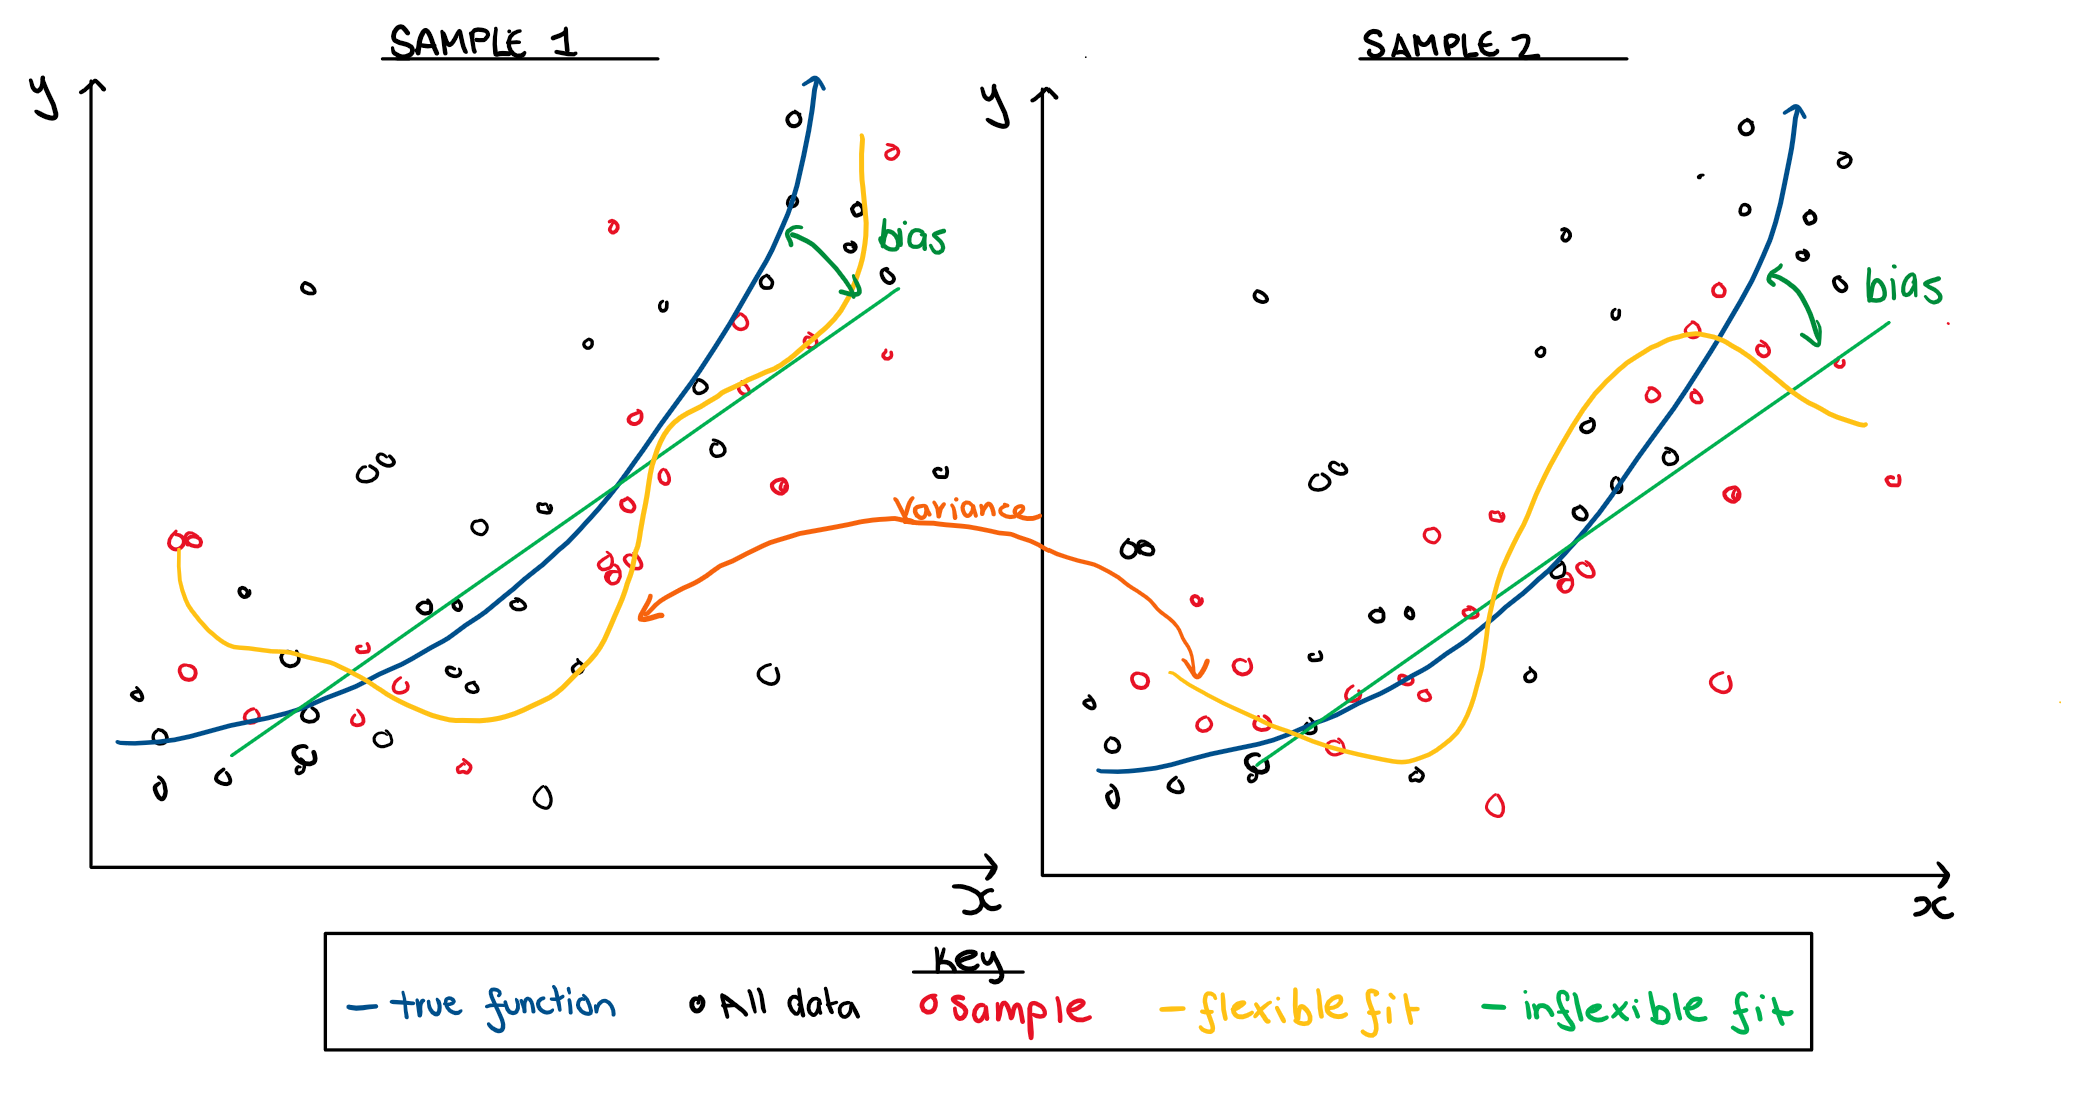

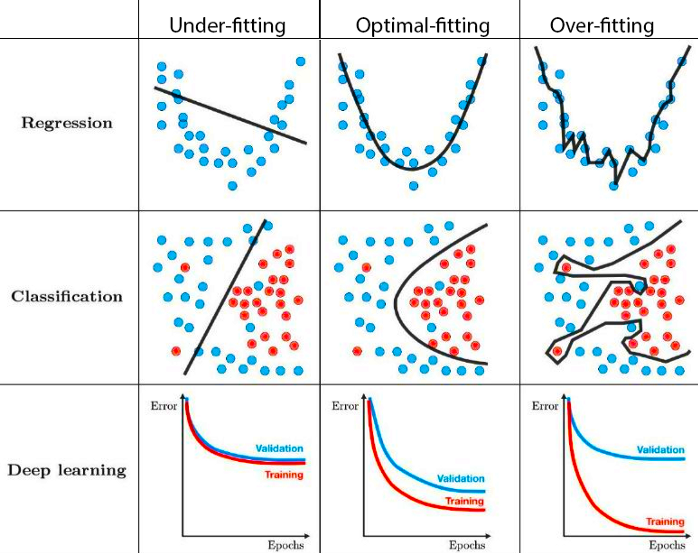

### Exercice 2

Expliquer pour chaque scénario s'il depend d'un problème de `regression` ou de `classification`</br>
Indiquer si c'est une `INFERENCE` ou `PREDICTION`</br>
Enfin, indiquer le nombre de sample `n` et le nombre de variable `p`

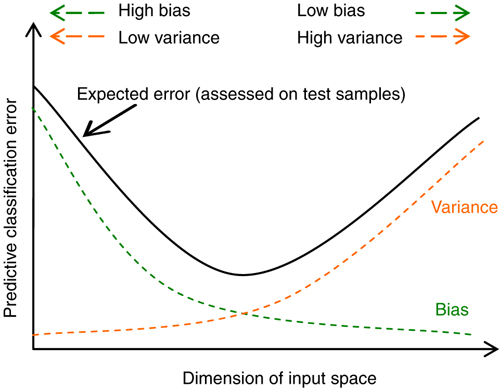

**Prédiction** : Essayez de trouver une fonction $𝑓̂$  qui correspond étroitement $𝑓$ . Pas si préoccupé par la forme ou la déchiffrement de $𝑓$ . Je veux juste une bonne prédiction pour chaque entrée.

**Inférence** : Vous voulez comprendre la relation entre $𝑋$ et $𝑌$ . Comment la modification d'un paramètre modifie-t-elle la sortie. Trouver uniquement les prédicteurs importants. Quel type de modèle utiliser (linéaire vs non linéaire) ?

<b>2-a</b>

On collecte un jeu de données pour les 500 plus grandes entreprises du pays.</br>
Pour chaque entreprise, on enregistre `profit`, `nombre d'employés`, `domaine d'activité` et `salaire CEO`</br>
On veut comprendre quels sont les facteurs qui affectent `salaire CEO`

C'est un problème de **Regression** car la valeur de sortie est **quantitative**</br>
On veut comprendre comment **profit**, **nombre d'employés** et **domaine d'activité** affectent `salaire CEO` : c'est une **INFERENCE** car on ne veut pas predire `salaire CEO`</br>
n = 500, p = 3

<b>2-b</b>

On veut lancer un nouveau produit et on veut savoir s'il va être un succès ou un échec</br>
On collecte des données de 20 produits similaires que l'on a déja lancer</br>
Pour chaque produit, on a enregistré `succès ou échec`, `prix du produit`, `budget marketing`, `prix concurrence` et `10 autres variables` 

C'est un problème de **Classification** car on veut savoir si ca va être un **succès(1)** ou un **echec(0)** : c'est un problème **binaire**</br>
C'est une **Prédiction** car on veut prédire la valeur de la target</br>
n = 20, p = 13

<b>2-c</b>

On veut prédire le % de change entre le taux d'échange USD / EURO en rapport avec le taux de change par semaine sur les marchés mondiaux</br>
On prélève chaque semaine pendant un an le `% de change en USD/Euro`, le `% de change sur US market`, le `% change sur British market`,
et le`% de change sur German market`

C'est un problème de **Régression** / **Prédiction** car on veut prédire le taux de change USD/EURO qui est une valeur continue</br>
n = 52, p = 3

### Exercice 3

### BIAS VARIANCE TRADE OFF
## $$E(y_0 − \hat f(x_0)) = Var(\hat f(x_0)) + [Bias(\hat f(x_0))]^2 + Var(ϵ)$$

$E(y_0 − \hat f(x_0))$ : expected test MSE = **Sum of Squared residuals**</br>
$Var(\hat f(x_0))$ : variance de $\hat f(x_0))$</br>
$[Bias(\hat f(x_0))]^2$ : squared bias de $\hat f(x_0))$</br>
$Var(ϵ)$ : irreductible error(variance de l'erreur $ϵ$)

In [51]:
bias = np.array([6, 4, 2, 1, .5, .1])
variance = bias[::-1]
training_error = bias * 1.1
test_error = np.array([7, 5, 2, 2, 5, 7])
irreducible_error = np.ones(6) * 1.5

In [57]:
print(bias)
print(variance)
print(training_error)
print(test_error)
print(irreducible_error)

[6.  4.  2.  1.  0.5 0.1]
[0.1 0.5 1.  2.  4.  6. ]
[6.6  4.4  2.2  1.1  0.55 0.11]
[7 5 2 2 5 7]
[1.5 1.5 1.5 1.5 1.5 1.5]


In [59]:
df_3 = pd.DataFrame({'bias': bias,
              'variance':variance,
             'training_error': training_error,
             'test_error':test_error,
             'irreducible_error(Var(E))': irreducible_error})

Text(0.5, 0, 'Complexity')

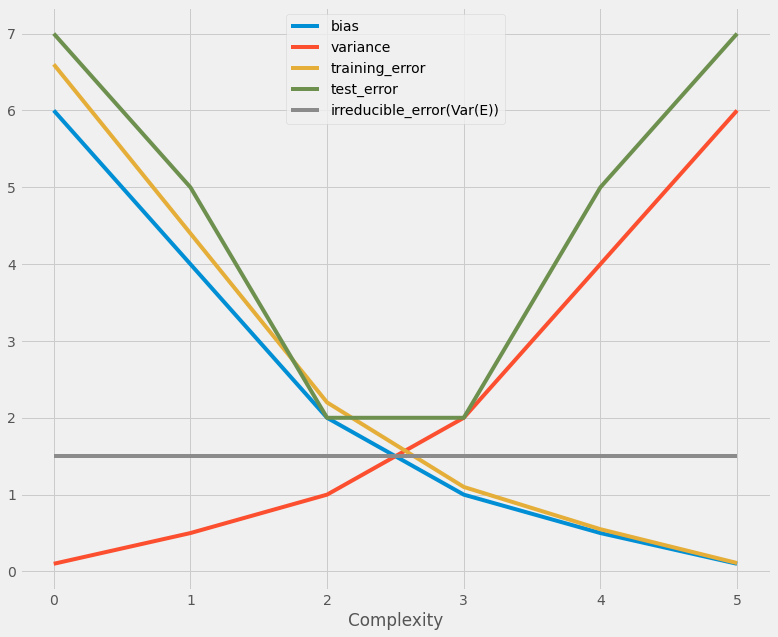

In [60]:
df_3.plot(figsize=(12,10))
plt.xlabel('Complexity')

**Biais**- Lorsque vous utilisez un modèle inflexible, il est peu probable que le modèle choisi corresponde étroitement à la situation réelle.</br>
L'ajout de flexibilité permettra un alignement beaucoup plus étroit entre le modèle et la réalité</br>
Généralement, le **biais** est réduit à mesure que la flexibilité augmente en raison de la meilleure capacité d'ajustement de la méthode aux données.

La **variance** augmente à mesure que la flexibilité augmente, car une plus grande flexibilité permet d'adapter plus de bruit</br>
La **variance** augmente à mesure que la méthode a tendance à **overfit** à mesure que la flexibilité augmente (s'adaptant trop bien aux données d'apprentissage et ne généralisant pas aux données de test).</br>

**Training error** pourrait diminuer jusqu'à 0 à mesure que la flexibilité augmente, car il devient possible de modéliser la quasi-totalité de l'erreur.</br>
Il diminue car plus de flexibilité signifie que la méthode peut s'adapter très étroitement aux données de formation.

**Test error** peut initialement diminuer jusqu'à ce qu'une certaine flexibilité soit atteinte, puis un **overfit** se produira inévitablement et l'erreur recommencera à augmenter</br>
Il réduit à un point optimal car une flexibilité accrue signifie un meilleur ajustement, avec des augmentations supplémentaires conduisant à un **overfitting**

**Irreducible error(Var(E))** est un bruit aléatoire constant inhérent aux données.</br>
les prédictions du test ne peuvent pas être meilleures que cela, c'est donc une ligne droite.</br>

### Exercice 4

**Les méthodes de classification seraient utiles pour les applications où les résultats doivent être classés dans une catégorie, cela peut être une classification binaire ou une classification multi-classes. Quelques domaines où la classification pourrait être utile** :

- **Prédiction du cancer du sein** : étant donné un ensemble de prédicteurs tels qu'une mammographie, l'âge, les antécédents familiaux, le mode de vie et d'autres variables, et une réponse Oui (a un cancer) et Non (n'a pas de cancer) - nous pouvons alors former un modèle pour prédire si une patiente a un cancer du sein.


- **Classification des espèces de plantes** : étant donné un ensemble d'images d'une plante, un modèle peut être formé qui classera cette plante dans l'une des espèces formées. Il s'agit d'un problème de classification multi-classes. La réponse serait le nom de l'espèce et les prédicteurs seraient des images de cette espèce.


- **Détection des fraudes** : classer si une transaction est frauduleuse, en fonction de données telles que le montant de la transaction, l'emplacement, l'article ou le service acheté, les transactions client précédentes, etc. La réponse serait "Oui" ou "Non", et notre objectif est de faire une prédiction.


- **Cours de l'action** : indiquez si le prix d'une action augmentera ou baissera le jour suivant en fonction d'un ensemble de données financières et d'actualités de la semaine précédente. Le but est de faire une prédiction.

**Les méthodes de régression sont utiles lorsque nous avons une réponse quantitative ; c'est là que nous devons prédire une valeur numérique pour notre réponse. Certains domaines où la régression pourrait être utile sont** :

- **Facteurs de prix de l'immobilier** : étant donné un ensemble de prédicteurs tels que l'emplacement, les caractéristiques de l'immobilier, le revenu médian de la région, etc. et le prix de l'immobilier comme réponse/cible, nous pouvons former un modèle pour déduire l'impact de ces variables sur les prix de l'immobilier.


- **Salaire** : prédire le salaire d'un individu en fonction de son éducation, de ses antécédents professionnels, de ses compétences et d'autres données pertinentes (âge, sexe, etc.). La réponse est le montant du salaire.


- **Ventes** : prédisez les ventes unitaires d'un produit à partir de données marketing telles que les dépenses publicitaires à la télévision, à la radio ou sur Internet, et utilisez-les pour déduire l'importance de chaque méthode publicitaire. La réponse correspond aux ventes unitaires du produit.


- **Prime d'assurance conduite** : étant donné un ensemble de variables telles que l'historique du conducteur, l'âge, le type de véhicule, le kilométrage annuel prévu et la prime comme réponse, nous pouvons former un modèle pour prédire la prime d'assurance pour les nouveaux clients.

**Analysis Clustering est utile dans les cas où nous n'avons pas de réponse cible disponible – c'est-à-dire l'apprentissage non supervisé. Nous pouvons viser à déterminer si les observations peuvent être classées en groupes distincts ou comprendre s'il existe une relation sous-jacente entre les variables. Certains domaines où cela peut être utile sont** : 

- **Classification des tissus**: le regroupement peut être utilisé pour séparer différents types de tissus dans les images médicales. Cela peut être utile pour identifier les groupes de tissus qui ne sont pas normaux et nécessitent une étude plus approfondie. 


- **Étude de marché** : différencier un groupe de personnes au sein d'une ville en segments de marché distincts pour accroître l'efficacité du marketing ou identifier de nouvelles opportunités. Étant donné des données telles que les revenus, la localisation, l'âge, le sexe, les sondages d'opinion, etc. pour une ville, nous pouvons segmenter la ville en différentes zones de consommation.


- **Segmentation d'images** : Séparez une image en différentes régions pour faciliter la reconnaissance des objets. Par exemple, la segmentation des images d'une caméra vidéo dans une voiture en « autres véhicules », « humains », « panneaux de signalisation », etc. peut aider les ADAS (systèmes avancés d'assistance à la conduite) dans les véhicules à prendre la bonne décision.


- **Segmentation du marché des jeux** : étant donné un ensemble d'observations avec des variables telles que l'âge, le lieu, le revenu, le sexe, les heures passées à jouer, les appareils de jeu utilisés, etc. Nous pourrions utiliser l'analyse par grappes pour voir si ces observations appartiennent à des groupes distincts. S'il existe des groupes distincts, cela pourrait être utile pour une étude plus approfondie - par exemple, un groupe pourrait représenter les joueurs occasionnels et les autres joueurs inconditionnels, et un autre pourrait être les nouveaux joueurs (disons les personnes de plus de 60 ans).

### Exercice 5 / 6

Quels sont les avantages et les inconvénients d'une approche **très flexible** (par rapport à une approche moins flexible) pour la **régression** ou la **classification** ?</br>

Dans quelles circonstances une approche **plus flexible** pourrait-elle être préférée à une approche **moins flexible** ? Quand une approche moins flexible pourrait-elle être préférée ?

Décrire les différences entre une approche d'apprentissage statistique **paramétrique** et **non paramétrique**.

Quels sont les avantages d'une approche paramétrique de **régression** ou de **classification** (par opposition à une approche non paramétrique) ? Quels sont ses inconvénients ?

Les **méthodes flexibles** fonctionnent bien lorsque la fonction sous-jacente est **non linéaire**.</br>
Les prédictions ont en général un **biais plus faible** mais peuvent avoir une **variance plus élevée**, car ces modèles sont plus susceptibles de **overfit** les données

Les méthodes **moins flexibles** n'ont pas tendance à overfit les données mais peuvent avoir un **biais important** lorsque la fonction sous-jacente n'est **pas linéaire**. Ils peuvent également utiliser **moins d'observations et de paramètres**, en particulier lorsqu'il est supposé que la fonction sous-jacente est **linéaire**. Les méthodes flexibles ont tendance à nécessiter un plus grand nombre d'observations et de paramètres, et peuvent conduire à un **overfit (variance plus élevée)**.


Les méthodes **flexibles (méthodes non paramétriques)** sont préférables lorsqu'on ne fait **aucune hypothèse** sur la fonction à estimer. La plupart des **relations réelles** sont **non linéaires** et donc une approche non paramétrique est plus adaptée pour les modéliser. Les **modèles flexibles**, de par leur nature, sont **plus complexes** et **moins interprétables** que leurs homologues linéaires, donc même si leurs prédictions peuvent être plus précises, nous ne serons peut-être pas en mesure d'expliquer pourquoi il a fait ces prédictions (**black box model**).


Les méthodes **moins flexibles (paramétriques)** sont utiles si nous supposons ou savons que la fonction sous-jacente est **linéaire**. Comme une relation linéaire est supposée, le modèle doit prédire **moins de paramètres** qu'une méthode non paramétrique. De plus, ces modèles sont **plus interprétables** et seront donc préférés lorsque nous nous intéresserons à faire des **inférences** ou à l'**interprétabilité des résultats**.

### Exercice 7

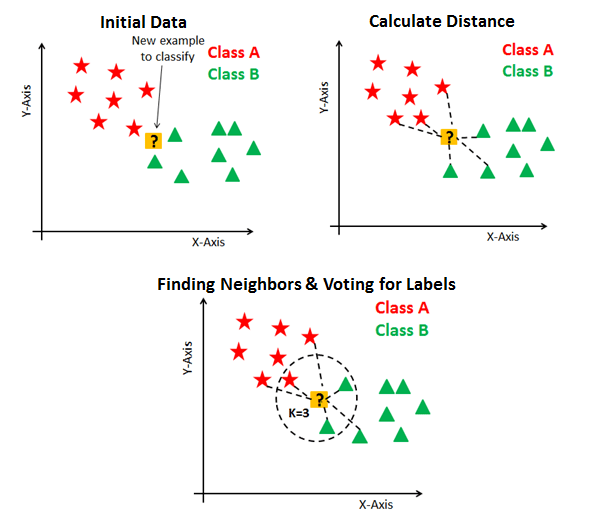

In [63]:
df = pd.DataFrame({'X1' : [0,2,0,0,-1,1],
                   'X2' : [3,0,1,1,0,1],
                   'X3' : [0,0,3,2,1,1],
                   'Y' : ['Red','Red','Red','Green','Green','Red']})

In [64]:
df

X1  X2  X3      Y
0   0   3   0    Red
1   2   0   0    Red
2   0   1   3    Red
3   0   1   2  Green
4  -1   0   1  Green
5   1   1   1    Red

On veut faire une prediction de $Y$ quand $X1 = X2 = X3 = 0$ using **K-nearest neighbors**.

**Euclidean Distance**:  $d(p, q) =\sqrt{(p_1 - q_1)^2 + (p_2 - q_2)^2 + (p_3 - q_3)^2} $

p : correspond aux **3 coordonnées($p_1$,$p_2$,$p_3$)** de chaque observation</br>
q : correspond aux valeurs cherchées $X1 = X2 = X3 = 0$ 

par exemple, pour la 1ere observation on obtient:</br>
$d(1, test) =\sqrt{(0 - 0)^2 + (0 - 3)^2 + (0 - 0)^2} = 3$

pour la 2e observation on obtient:</br>
$d(2, test) =\sqrt{(0 - 2)^2 + (0 - 0)^2 + (0 - 0)^2} = 2$

pour la 3e observation on obtient:</br>
$d(3, test) =\sqrt{(0 - 0)^2 + (0 - 1)^2 + (0 - 3)^2} = 3.16$

ect...

In [65]:
df.values[:, :3]

array([[0, 3, 0],
       [2, 0, 0],
       [0, 1, 3],
       [0, 1, 2],
       [-1, 0, 1],
       [1, 1, 1]], dtype=object)

In [67]:
dist = (df.values[:, :3] - np.array([0, 0, 0])) ** 2
dist

array([[0, 9, 0],
       [4, 0, 0],
       [0, 1, 9],
       [0, 1, 4],
       [1, 0, 1],
       [1, 1, 1]], dtype=object)

In [70]:
sum_dist = np.sum(dist, axis = 1).astype('float') 
sum_dist

array([ 9.,  4., 10.,  5.,  2.,  3.])

In [71]:
euclidean_dist = np.sqrt(sum_dist)
euclidean_dist

array([3.        , 2.        , 3.16227766, 2.23606798, 1.41421356,
       1.73205081])

In [72]:
np.zeros((1, 3))

array([[0., 0., 0.]])

In [80]:
d = np.sqrt(np.sum((df.values[:, :3] - np.zeros((1, 3)))**2, axis = 1).astype('float'))
d

array([3.        , 2.        , 3.16227766, 2.23606798, 1.41421356,
       1.73205081])

In [85]:
def euclidean_dist(df, num_of_coord):
    n = num_of_coord
    return np.sqrt(np.sum((df.values[:, :n] - np.zeros((1, n)))**2, axis = 1).astype('float'))

In [86]:
euclidean_dist(df, 3)

array([3.        , 2.        , 3.16227766, 2.23606798, 1.41421356,
       1.73205081])

**Question** : Quelle est la prediction pour $K=1$ ?

si $K=1$, la distance la plus courte entre $X'(0,0,0)$ et $Y$ est 1.41 qui correspond au **5e point** $X(-1,0,1)$ ===> **Green**

**Question** : Quelle est la prediction pour $K=3$ ?

si $K=3$, On prend les **3 points** qui ont la plus courte distance a $X'(0,0,0)$ cad les **2e, 5e et 6e points** qui ont pour coordonnées :</br>

$X(2,0,0)$ ===> $distance = 2.$ ===> $P(1/3)$ = **Red**</br> 
$X(-1,0,1)$ ===> $distance = 1.41$ ===> $P(1/3)$ = **Green**</br>
$X(1,1,1)$ ===> $distance = 1.73$ ===> $P(1/3)$ = **Red**

Il y a $P(2/3)$ d'être **Red** et $P(1/3)$ d'être **Green** 

donc la prédiction est **Red**

**Question** :  Si **Bayes decision boundary** dans ce problème est hautement **non linéaire**, alors s'attendrait-on à ce que la **meilleure valeur de K** soit **grande ou petite** ? Pourquoi?

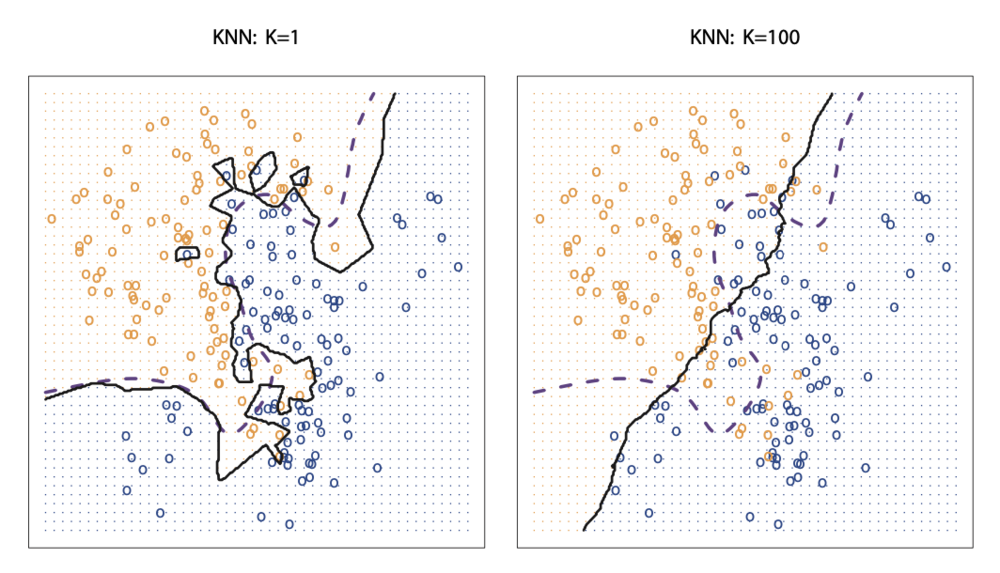

Pour les **frontières hautement non linéaires**, nous nous attendrions à ce que la **meilleure valeur de K** soit **petite**.</br>
Des valeurs **plus petites de K** entraînent un **modèle KNN plus flexible**, ce qui produira une **frontière de décision non linéaire**.</br>
Un **K plus grand** signifierait que **plus de points de données** sont pris en compte par le modèle KNN, ce qui signifie que sa **frontière de décision** est **plus proche** d'une forme **linéaire**.

### Exercice 8

In [2]:
cd C:\Users\david\STATISTIQUES\Introduction to Statistical Learning\data

C:\Users\david\STATISTIQUES\Introduction to Statistical Learning\data


In [3]:
pwd

'C:\\Users\\david\\STATISTIQUES\\Introduction to Statistical Learning\\data'

In [4]:
df_college = pd.read_csv('college.csv', index_col=0)
df_college.head()

Private  Apps  Accept  Enroll  Top10perc  \
Abilene Christian University     Yes  1660    1232     721         23   
Adelphi University               Yes  2186    1924     512         16   
Adrian College                   Yes  1428    1097     336         22   
Agnes Scott College              Yes   417     349     137         60   
Alaska Pacific University        Yes   193     146      55         16   

                              Top25perc  F.Undergrad  P.Undergrad  Outstate  \
Abilene Christian University         52         2885          537      7440   
Adelphi University                   29         2683         1227     12280   
Adrian College                       50         1036           99     11250   
Agnes Scott College                  89          510           63     12960   
Alaska Pacific University            44          249          869      7560   

                              Room.Board  Books  Personal  PhD  Terminal  \
Abilene Christian University        3300    450      2200   70        78   
Adelphi University                  6450    750      1500   29        30   
Adrian College                      3750    400      1165   53        66   
Agnes Scott College                 5450    450       875   92        97   
Alaska Pacific University           4120    800      1500   76        72   

                              S.F.Ratio  perc.alumni  Expend  Grad.Rate  
Abilene Christian University       18.1           12    7041         60  
Adelphi University                 12.2           16   10527         56  
Adrian College                     12.9           30    8735         54  
Agnes Scott College                 7.7           37   19016         59  
Alaska Pacific University          11.9            2   10922         15

In [5]:
df_college.shape

(777, 18)

• **Private** : Indicateur Public/Privé</br>
• **Apps** : Nombre de candidatures reçues</br>
• **Accept** : Nombre de candidats acceptés</br>
• **Enroll** : Nombre de nouveaux élèves inscrits</br>
• **Top10perc** : Nouveaux élèves du top 10 % de la classe du lycée</br>
• **Top25perc** : Nouveaux élèves du top 25 % de la classe de lycée</br>
• **F.Undergrad** : Nombre d'étudiants à temps plein</br>
• **P.Undergrad** : Nombre d'étudiants à temps partiel</br>
• **Outstate** : Frais de scolarité en dehors de l'État</br>
• **Room.Board** : Frais de chambre et pension</br>
• **Books** : Cout des livres estimé</br>
• **Personal** : Dépenses personnelles estimées</br>
• **PhD** : Pourcentage d'université avec Ph.D</br>
• **Terminal** : Pourcentage d'université avec diplome terminal</br>
• **S.F.Ratio** : Ratio étudiants/professeurs</br>
• **perc.alumni** : Pourcentage d'anciens qui font un don</br>
• **Expend** : Dépenses d'enseignement par étudiant</br>
• **Grad.Rate** : Taux de diplomés

In [6]:
df_college.describe()

Apps        Accept       Enroll   Top10perc   Top25perc  \
count    777.000000    777.000000   777.000000  777.000000  777.000000   
mean    3001.638353   2018.804376   779.972973   27.558559   55.796654   
std     3870.201484   2451.113971   929.176190   17.640364   19.804778   
min       81.000000     72.000000    35.000000    1.000000    9.000000   
25%      776.000000    604.000000   242.000000   15.000000   41.000000   
50%     1558.000000   1110.000000   434.000000   23.000000   54.000000   
75%     3624.000000   2424.000000   902.000000   35.000000   69.000000   
max    48094.000000  26330.000000  6392.000000   96.000000  100.000000   

        F.Undergrad   P.Undergrad      Outstate   Room.Board        Books  \
count    777.000000    777.000000    777.000000   777.000000   777.000000   
mean    3699.907336    855.298584  10440.669241  4357.526384   549.380952   
std     4850.420531   1522.431887   4023.016484  1096.696416   165.105360   
min      139.000000      1.000000   2340.000000  1780.000000    96.000000   
25%      992.000000     95.000000   7320.000000  3597.000000   470.000000   
50%     1707.000000    353.000000   9990.000000  4200.000000   500.000000   
75%     4005.000000    967.000000  12925.000000  5050.000000   600.000000   
max    31643.000000  21836.000000  21700.000000  8124.000000  2340.000000   

          Personal         PhD    Terminal   S.F.Ratio  perc.alumni  \
count   777.000000  777.000000  777.000000  777.000000   777.000000   
mean   1340.642214   72.660232   79.702703   14.089704    22.743887   
std     677.071454   16.328155   14.722359    3.958349    12.391801   
min     250.000000    8.000000   24.000000    2.500000     0.000000   
25%     850.000000   62.000000   71.000000   11.500000    13.000000   
50%    1200.000000   75.000000   82.000000   13.600000    21.000000   
75%    1700.000000   85.000000   92.000000   16.500000    31.000000   
max    6800.000000  103.000000  100.000000   39.800000    64.000000   

             Expend  Grad.Rate  
count    777.000000  777.00000  
mean    9660.171171   65.46332  
std     5221.768440   17.17771  
min     3186.000000   10.00000  
25%     6751.000000   53.00000  
50%     8377.000000   65.00000  
75%    10830.000000   78.00000  
max    56233.000000  118.00000

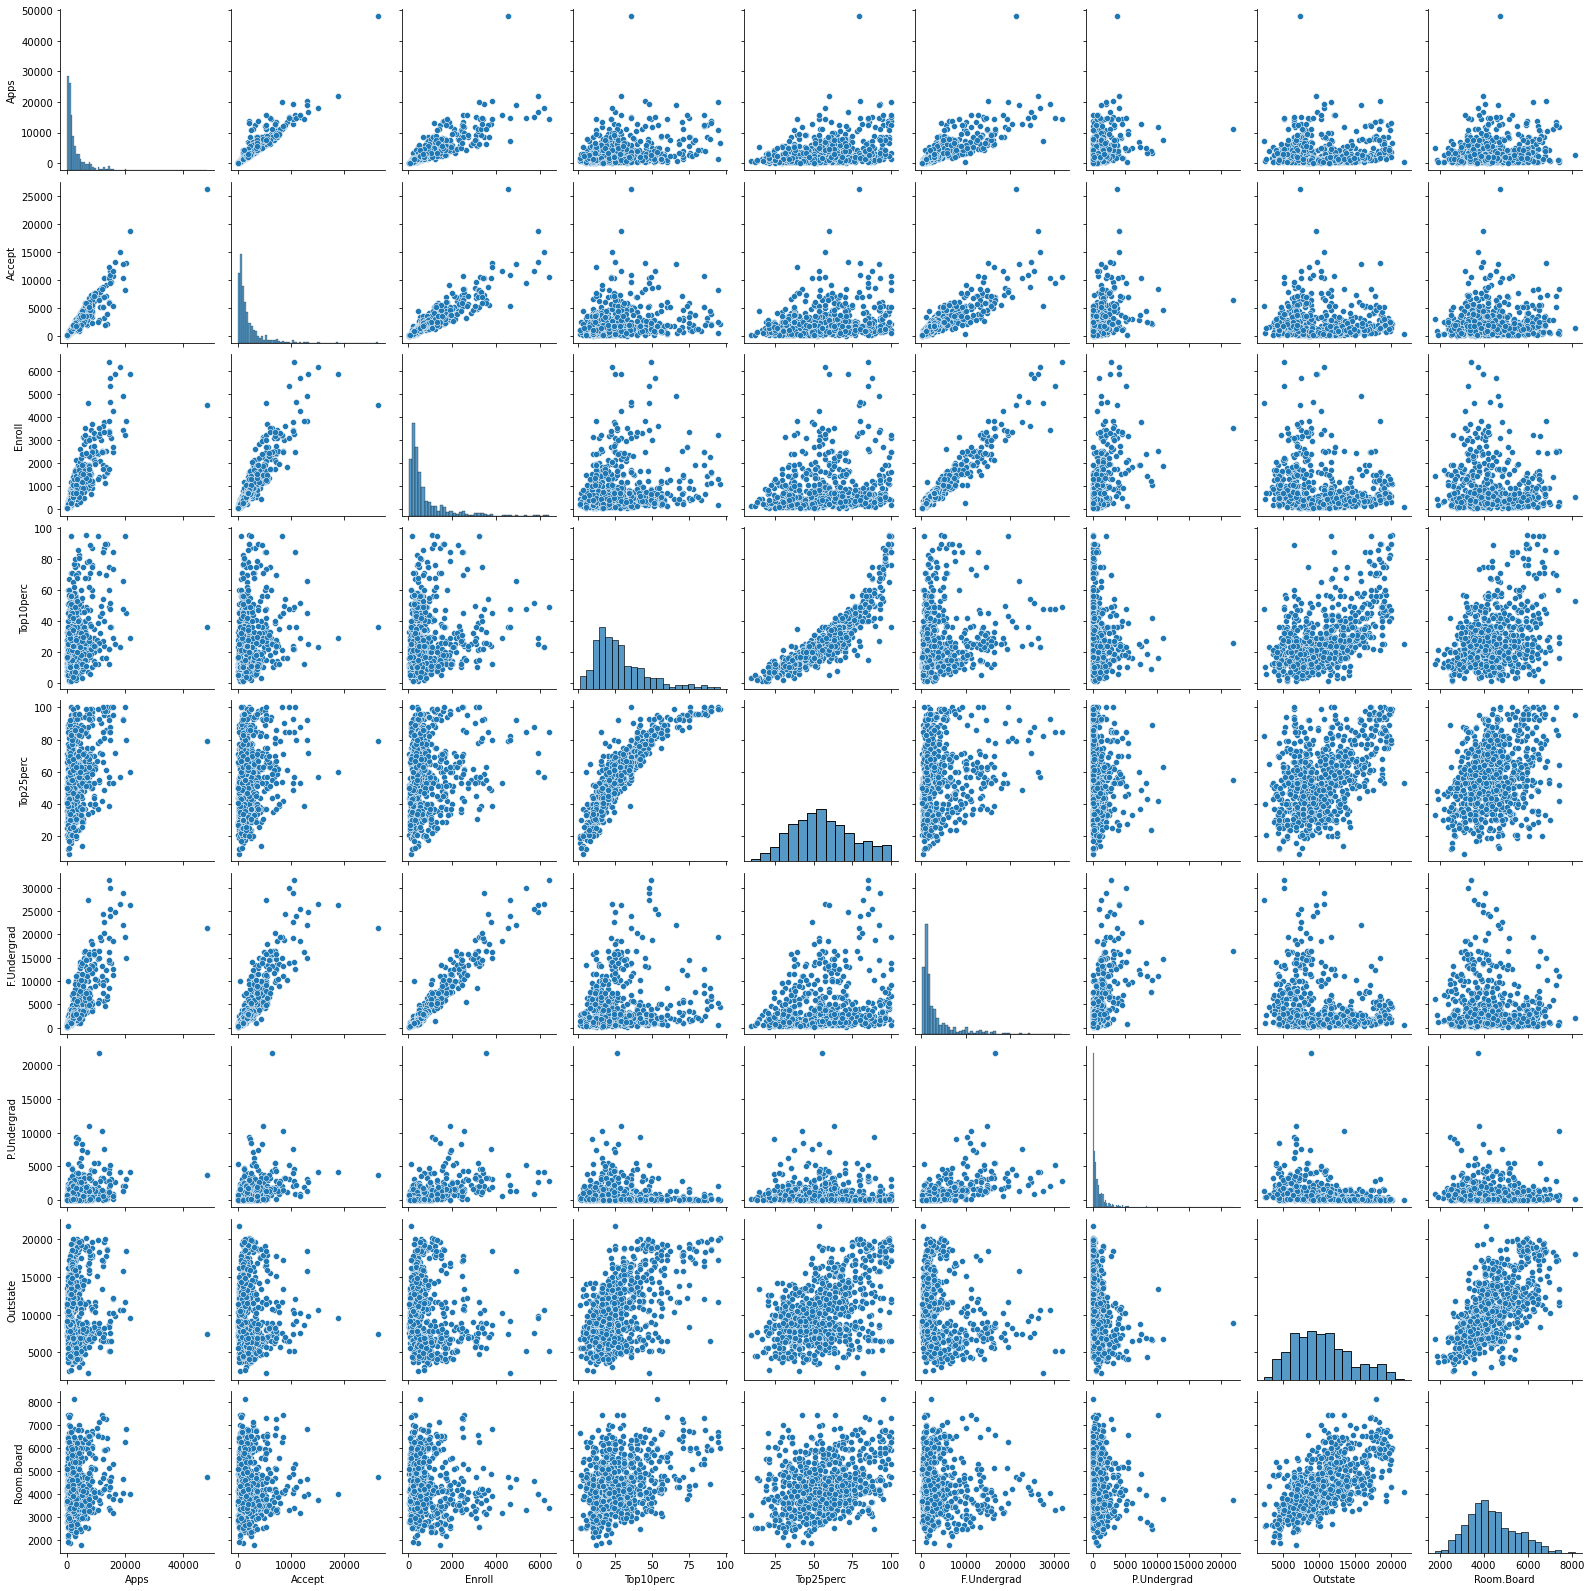

In [7]:
import seaborn as sns

sns.pairplot(df_college.iloc[:, :10])

In [13]:
plt.style.use('fivethirtyeight')

<AxesSubplot:xlabel='Private', ylabel='Outstate'>

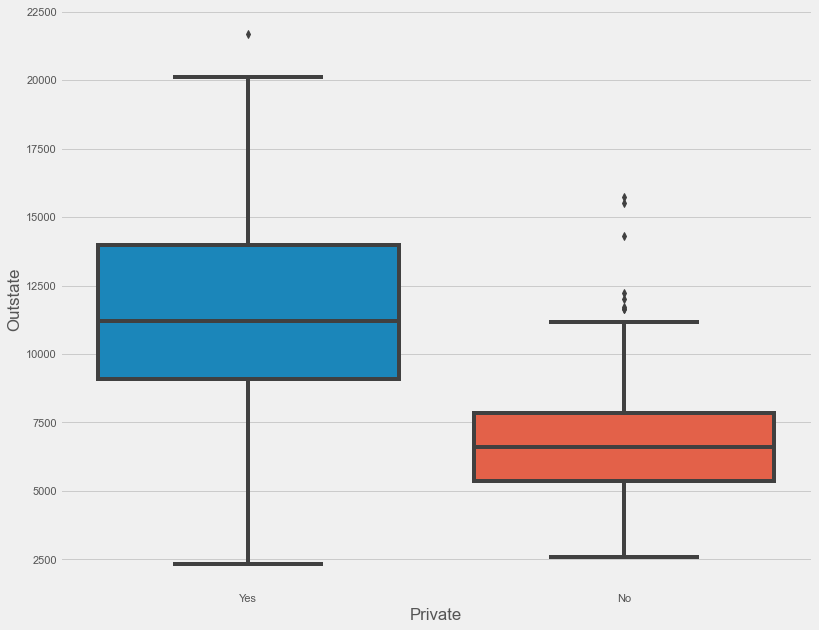

In [14]:
sns.boxplot(y = 'Outstate', x = 'Private', data=df_college)

Créez une nouvelle variable qualitative, appelée `Elite`, en regroupant la variable `Top10perc`.</br>
Nous allons diviser les universités en deux groupes selon que la proportion d'étudiants issus du top 10 % de leurs classes de lycée dépasse ou non 50 %.

In [15]:
df_college['Top10perc'] > 50

Abilene Christian University      False
Adelphi University                False
Adrian College                    False
Agnes Scott College                True
Alaska Pacific University         False
                                  ...  
Worcester State College           False
Xavier University                 False
Xavier University of Louisiana    False
Yale University                    True
York College of Pennsylvania      False
Name: Top10perc, Length: 777, dtype: bool

In [16]:
pd.Categorical(np.where(df_college['Top10perc'] > 50, 'Yes', 'No'))

['No', 'No', 'No', 'Yes', 'No', ..., 'No', 'No', 'No', 'Yes', 'No']
Length: 777
Categories (2, object): ['No', 'Yes']

In [17]:
df_college['Elite'] = np.where(df_college['Top10perc'] > 50, 'Yes', 'No')
df_college['Elite'].value_counts()

No     699
Yes     78
Name: Elite, dtype: int64

<AxesSubplot:xlabel='Elite', ylabel='Outstate'>

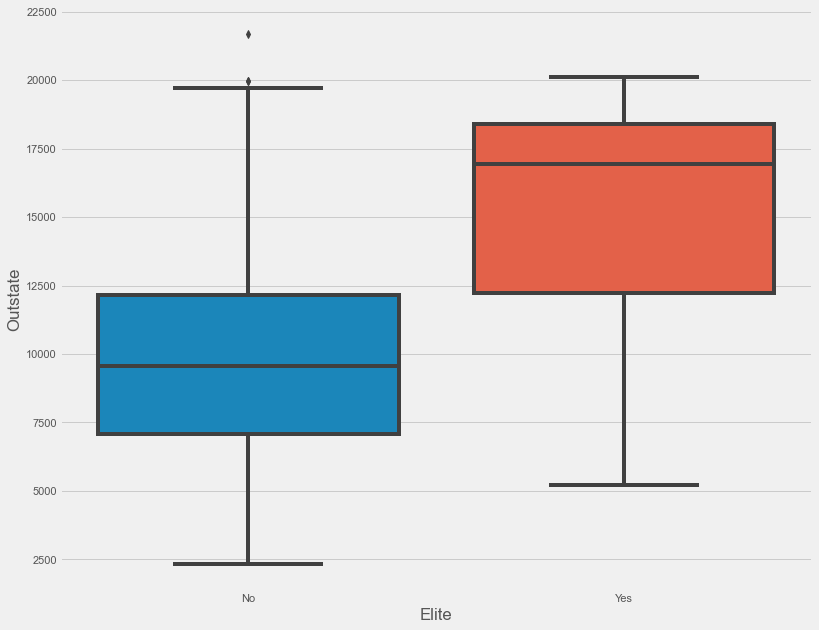

In [18]:
sns.boxplot(x = 'Elite', y = 'Outstate', data=df_college)

In [19]:
df_college.dtypes

Private         object
Apps             int64
Accept           int64
Enroll           int64
Top10perc        int64
Top25perc        int64
F.Undergrad      int64
P.Undergrad      int64
Outstate         int64
Room.Board       int64
Books            int64
Personal         int64
PhD              int64
Terminal         int64
S.F.Ratio      float64
perc.alumni      int64
Expend           int64
Grad.Rate        int64
Elite           object
dtype: object

In [25]:
(df_college['Apps'] > 20000).sum()

3

In [33]:
df_college[df_college['Apps'] > 20000]

Private   Apps  Accept  Enroll  Top10perc  \
Boston University                       Yes  20192   13007    3810         45   
Purdue University at West Lafayette      No  21804   18744    5874         29   
Rutgers at New Brunswick                 No  48094   26330    4520         36   

                                     Top25perc  F.Undergrad  P.Undergrad  \
Boston University                           80        14971         3113   
Purdue University at West Lafayette         60        26213         4065   
Rutgers at New Brunswick                    79        21401         3712   

                                     Outstate  Room.Board  Books  Personal  \
Boston University                       18420        6810    475      1025   
Purdue University at West Lafayette      9556        3990    570      1060   
Rutgers at New Brunswick                 7410        4748    690      2009   

                                     PhD  Terminal  S.F.Ratio  perc.alumni  \
Boston University                     80        81       11.9           16   
Purdue University at West Lafayette   86        86       18.2           15   
Rutgers at New Brunswick              90        95       19.5           19   

                                     Expend  Grad.Rate Elite  
Boston University                     16836         72    No  
Purdue University at West Lafayette    8604         67    No  
Rutgers at New Brunswick              10474         77    No

In [48]:
new_apps = df_college[df_college['Apps'] < 20000].loc[:, 'Apps']

In [54]:
df_college['Apps'].apply(lambda x: x < 20000)

774

Text(0.5, 1.0, 'Outstate')

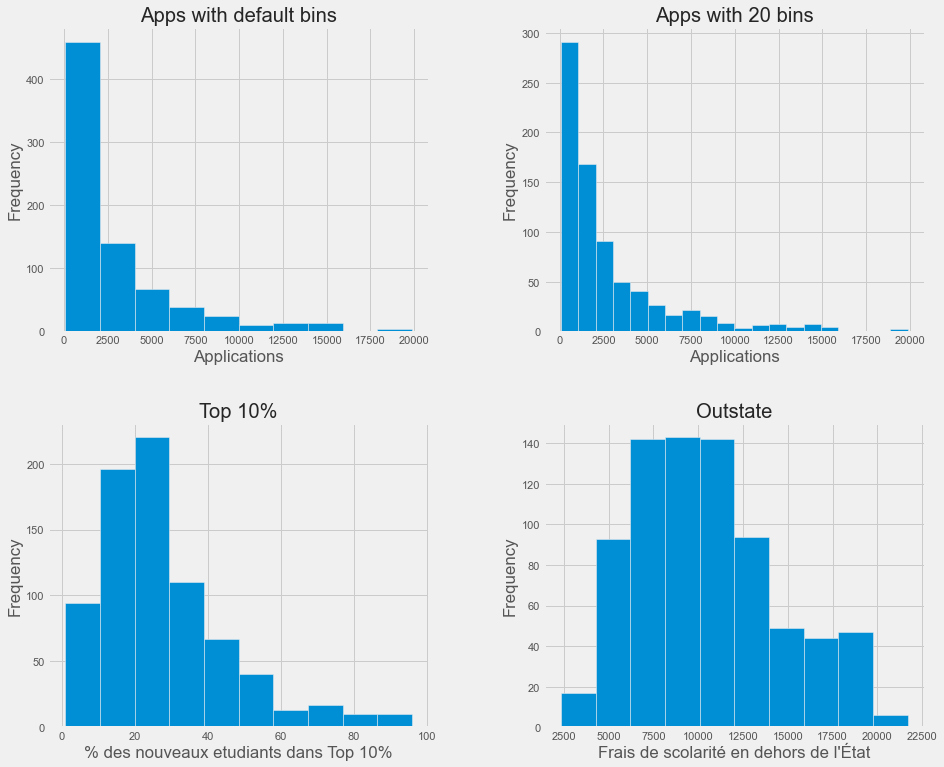

In [76]:
fig, ax = plt.subplots(2, 2, figsize = (14, 12))
plt.gcf().subplots_adjust(wspace = 0.3, hspace = 0.3)

ax[0,0].hist(new_apps)
ax[0,0].set_xlabel('Applications')
ax[0,0].set_ylabel('Frequency')
ax[0,0].set_title('Apps with default bins')

ax[0,1].hist(new_apps, bins = 20)
ax[0,1].set_xlabel('Applications')
ax[0,1].set_ylabel('Frequency')
ax[0,1].set_title('Apps with 20 bins')

ax[1,0].hist(df_college['Top10perc'])
ax[1,0].set_xlabel('% des nouveaux etudiants dans Top 10%')
ax[1,0].set_ylabel('Frequency')
ax[1,0].set_title('Top 10%')

ax[1,1].hist(df_college['Outstate'])
ax[1,1].set_xlabel("Frais de scolarité en dehors de l'État")
ax[1,1].set_ylabel('Frequency')
ax[1,1].set_title('Outstate')

On voit bien une asymétrie pour `Apps` (**right skew**), ce qui signifie que la majorité des universités recoivent moins de 2500 candidatures.

Il y a aussi une asymétrie(**righ skew**) pour `Top10perc` qui correspond que seulement 10% à 30% des universités ont un nombre d'étudiants qui sont dans le top 10% de leur classe

In [94]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

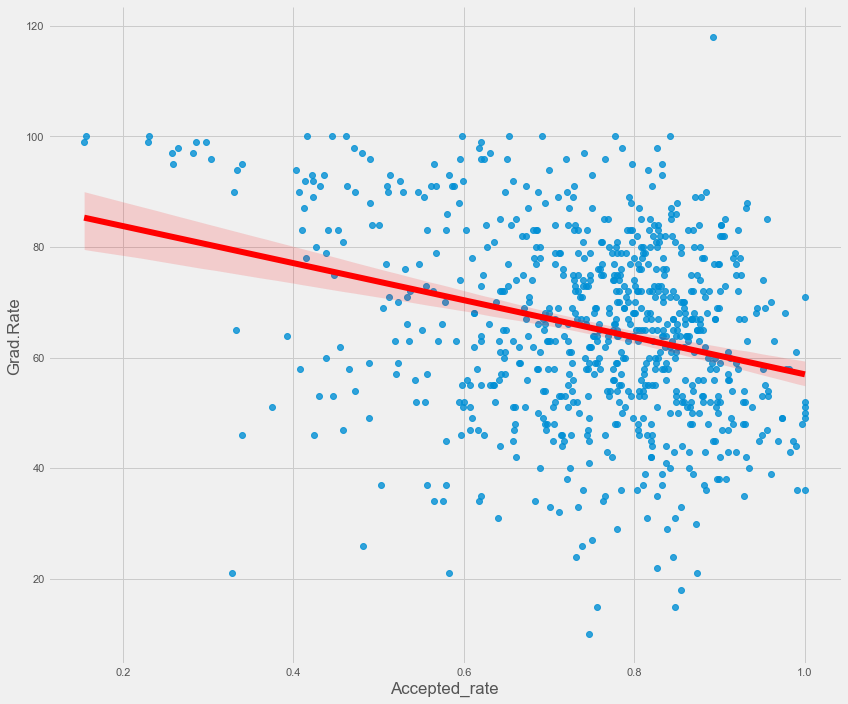

In [95]:
plt.style.use('fivethirtyeight')

df_college['Accepted_rate'] = df_college['Accept'] / df_college['Apps']

sns.lmplot(x = 'Accepted_rate', y = 'Grad.Rate', data = df_college, line_kws={'color': 'red'}, height=10, aspect=12/10)

On voit une **relation lineaire negative** entre le taux d'acceptation des etudiants et le taux de reussite à obtenir un diplome.

Cette relation implique que plus une université acceptent d'étudiants, et moins elle a de diplomés

Mais cette conclusion n'est pas bonne, car il y a très peu d'universités qui ont un taux d'acceptation inférieur a 40% : la majorité des universités acceptent entre 60% et 90% des candidatures et ont majoritairement un taux de diplomés compris entre 40% et 90%

### Exercice 9

(a) Parmi les prédicteurs, lesquels sont quantitatifs et lesquels sont qualitatifs ? 

(b) Quelle est la plage de chaque prédicteur quantitatif ? Vous pouvez répondre à cela en utilisant la fonction range().  

(c) Quels sont la moyenne et l'écart type de chaque prédicteur quantitatif ? 

(d) Supprimez maintenant les 10e à 85e observations. Quels sont la plage, la moyenne et l'écart type de chaque prédicteur dans le sous-ensemble de données restant ? 

(e) À l'aide de l'ensemble de données complet, étudiez les prédicteurs graphiquement, à l'aide de diagrammes de dispersion ou d'autres outils de votre choix. Créez des graphiques mettant en évidence les relations entre les prédicteurs. Commentez vos découvertes. 

(f) Supposons que nous souhaitions prédire la consommation d'essence (mpg) sur la base des autres variables. Vos graphiques suggèrent-ils que l'une des autres variables pourrait être utile pour prédire le mpg ? justifier


In [3]:
cd C:\Users\david\STATISTIQUES\Introduction to Statistical Learning\data

C:\Users\david\STATISTIQUES\Introduction to Statistical Learning\data


In [4]:
pwd

'C:\\Users\\david\\STATISTIQUES\\Introduction to Statistical Learning\\data'

In [5]:
df_auto = pd.read_csv('auto.csv')
df_auto.head()

mpg  cylinders  displacement  horsepower  weight  acceleration  year  \
0  18.0          8         307.0         130    3504          12.0    70   
1  15.0          8         350.0         165    3693          11.5    70   
2  18.0          8         318.0         150    3436          11.0    70   
3  16.0          8         304.0         150    3433          12.0    70   
4  17.0          8         302.0         140    3449          10.5    70   

   origin                       name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino

**mpg** : consommation de carburant(miles per galon = litres au 100km)</br>
**cylinders** : cylindrés(volume cumulé des cylindres d'un moteur à explosion)</br>
**displacement** : volume du cylindre balayé par l'ensemble des pistons d'un moteur à pistons(indicateur puissance moteur / consommation)</br>
**horsepower** : puissance moteur</br>
**weight** : poids du vehicule</br>
**acceleration** : acceleration du vehicule(mesurée en temps(s) pour atteindre 100km/h)</br>
**year** : date du vehicule</br>
**name** : nom du vehicule

In [17]:
df_auto.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
year            0
origin          0
name            0
dtype: int64

In [6]:
df_auto.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower        int64
weight            int64
acceleration    float64
year              int64
origin            int64
name             object
dtype: object

### (a) : predicteurs quantitatifs

In [7]:
for col in df_auto.select_dtypes('int64'):
    print(col)

cylinders
horsepower
weight
year
origin


In [8]:
for col in df_auto.select_dtypes('float64'):
    print(col)

mpg
displacement
acceleration


### predicteur qualitatif 

In [9]:
for col in df_auto.select_dtypes('object'):
    print(col)

name


In [10]:
df_auto['origin'].value_counts()

1    245
3     79
2     68
Name: origin, dtype: int64

les predicteurs **qualitatifs** sont : **name** et **origin** (origin est composé de 3 catégories de vehicules)

les predicateurs **quantitatifs** sont : **cylinders, horsepower, weight, year, mpg, displacement, acceleration**

In [11]:
df_auto.describe()

mpg   cylinders  displacement  horsepower       weight  \
count  392.000000  392.000000    392.000000  392.000000   392.000000   
mean    23.445918    5.471939    194.411990  104.469388  2977.584184   
std      7.805007    1.705783    104.644004   38.491160   849.402560   
min      9.000000    3.000000     68.000000   46.000000  1613.000000   
25%     17.000000    4.000000    105.000000   75.000000  2225.250000   
50%     22.750000    4.000000    151.000000   93.500000  2803.500000   
75%     29.000000    8.000000    275.750000  126.000000  3614.750000   
max     46.600000    8.000000    455.000000  230.000000  5140.000000   

       acceleration        year      origin  
count    392.000000  392.000000  392.000000  
mean      15.541327   75.979592    1.576531  
std        2.758864    3.683737    0.805518  
min        8.000000   70.000000    1.000000  
25%       13.775000   73.000000    1.000000  
50%       15.500000   76.000000    1.000000  
75%       17.025000   79.000000    2.000000  
max       24.800000   82.000000    3.000000

In [12]:
for i, el in enumerate(df_auto.describe().iloc[:,:-1]):
    print(f'{el:-<14} : min = {df_auto.describe().iloc[3,i]}, \tmax = {df_auto.describe().iloc[-1,i]}')

mpg----------- : min = 9.0, 	max = 46.6
cylinders----- : min = 3.0, 	max = 8.0
displacement-- : min = 68.0, 	max = 455.0
horsepower---- : min = 46.0, 	max = 230.0
weight-------- : min = 1613.0, 	max = 5140.0
acceleration-- : min = 8.0, 	max = 24.8
year---------- : min = 70.0, 	max = 82.0


In [23]:
quant = ['cylinders', 'horsepower', 'weight', 'year', 'mpg', 'displacement', 'acceleration']
for el in quant:
    print(f'{el:-<14} : mean = {round(df_auto[el].mean(),4)}, \tstd = {round(df_auto[el].std(),2)}')

cylinders----- : mean = 5.4719, 	std = 1.71
horsepower---- : mean = 104.4694, 	std = 38.49
weight-------- : mean = 2977.5842, 	std = 849.4
year---------- : mean = 75.9796, 	std = 3.68
mpg----------- : mean = 23.4459, 	std = 7.81
displacement-- : mean = 194.412, 	std = 104.64
acceleration-- : mean = 15.5413, 	std = 2.76


In [14]:
new_df_auto_in = df_auto.iloc[9:85, :-2].describe()
new_df_auto_in

mpg  cylinders  displacement  horsepower       weight  \
count  76.000000  76.000000     76.000000   76.000000    76.000000   
mean   19.460526   5.881579    224.230263  120.052632  3150.605263   
std     6.137189   1.861663    119.331372   45.421843   979.405562   
min     9.000000   3.000000     70.000000   46.000000  1613.000000   
25%    14.000000   4.000000    112.250000   87.750000  2261.500000   
50%    19.000000   6.000000    212.500000   98.500000  2947.500000   
75%    25.000000   8.000000    342.500000  156.250000  4107.250000   
max    35.000000   8.000000    455.000000  225.000000  5140.000000   

       acceleration       year  
count     76.000000  76.000000  
mean      14.769737  71.131579  
std        2.907967   0.822064  
min        8.000000  70.000000  
25%       13.000000  70.000000  
50%       14.500000  71.000000  
75%       16.125000  72.000000  
max       23.500000  73.000000

In [15]:
new_df_auto_out = pd.concat((df_auto.iloc[:10,:-2], df_auto.iloc[85:,:-2])).describe()
new_df_auto_out

mpg   cylinders  displacement  horsepower       weight  \
count  317.000000  317.000000    317.000000  317.000000   317.000000   
mean    24.374763    5.381703    187.880126  101.003155  2938.854890   
std      7.872565    1.658135    100.169973   36.003208   811.640668   
min     11.000000    3.000000     68.000000   46.000000  1649.000000   
25%     18.000000    4.000000    101.000000   75.000000  2215.000000   
50%     23.900000    4.000000    146.000000   90.000000  2795.000000   
75%     30.500000    6.000000    250.000000  115.000000  3520.000000   
max     46.600000    8.000000    455.000000  230.000000  4997.000000   

       acceleration        year  
count    317.000000  317.000000  
mean      15.704101   77.123028  
std        2.719913    3.127158  
min        8.500000   70.000000  
25%       14.000000   75.000000  
50%       15.500000   77.000000  
75%       17.300000   80.000000  
max       24.800000   82.000000

In [16]:
for el in quant:
    print(f"{el:-<14}: mean difference = {round(np.abs(new_df_auto_out[el]['mean'] - new_df_auto_in[el]['mean']),4)}, \tstd difference = {round(np.abs(new_df_auto_out[el]['std'] - new_df_auto_in[el]['std']),4)}")

cylinders-----: mean difference = 0.4999, 	std difference = 0.2035
horsepower----: mean difference = 19.0495, 	std difference = 9.4186
weight--------: mean difference = 211.7504, 	std difference = 167.7649
year----------: mean difference = 5.9914, 	std difference = 2.3051
mpg-----------: mean difference = 4.9142, 	std difference = 1.7354
displacement--: mean difference = 36.3501, 	std difference = 19.1614
acceleration--: mean difference = 0.9344, 	std difference = 0.1881


<Figure size 432x288 with 0 Axes>

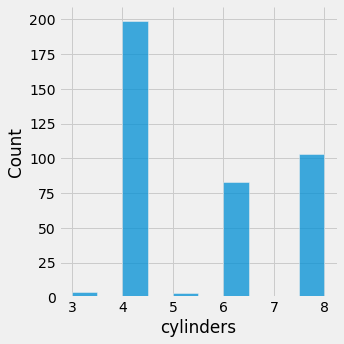

<Figure size 432x288 with 0 Axes>

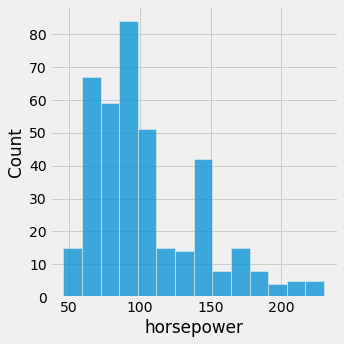

<Figure size 432x288 with 0 Axes>

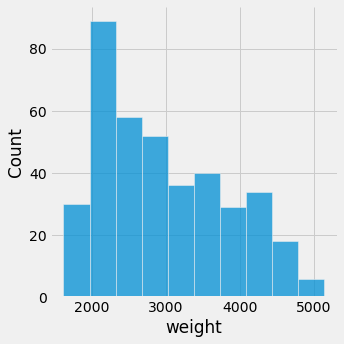

<Figure size 432x288 with 0 Axes>

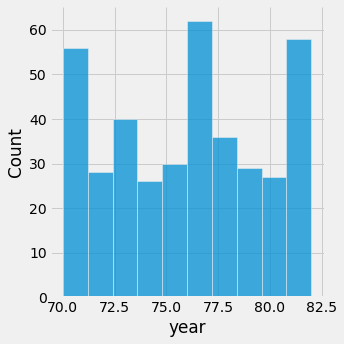

<Figure size 432x288 with 0 Axes>

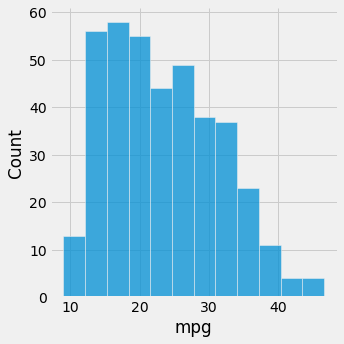

<Figure size 432x288 with 0 Axes>

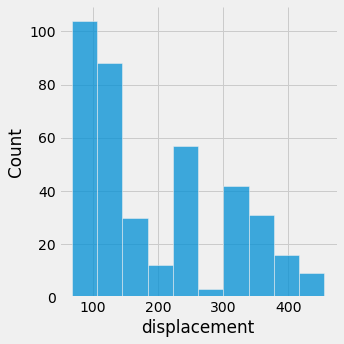

<Figure size 432x288 with 0 Axes>

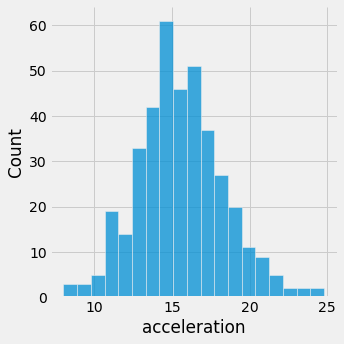

In [85]:
import seaborn as sns

for el in quant:
    plt.figure()
    sns.displot(df_auto[el])

In [112]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [121]:
plt.style.use('fivethirtyeight')

Text(0.5, 1.0, 'acceleration / horsepower')

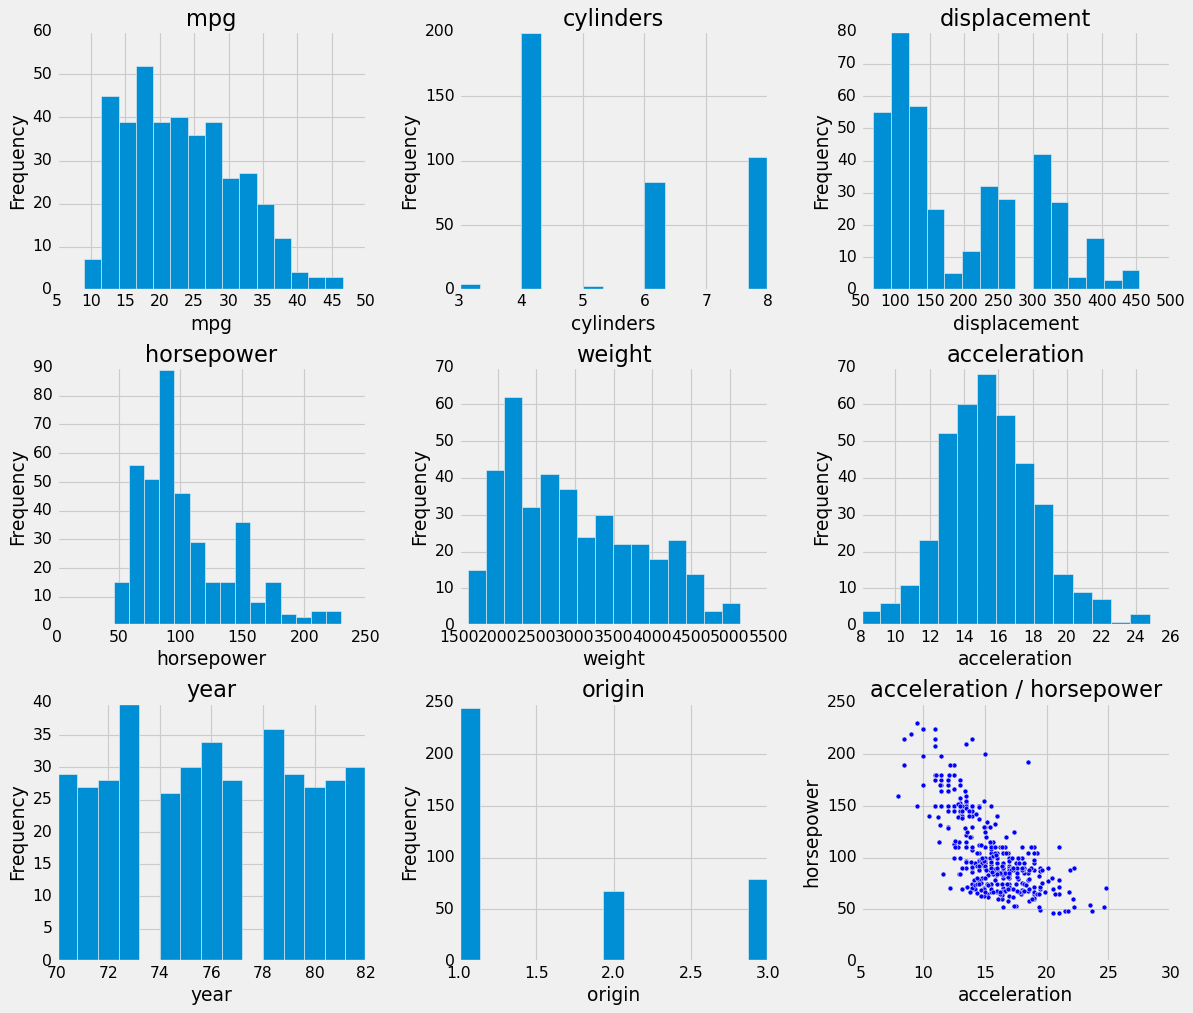

In [122]:
fig, ax = plt.subplots(3, 3, figsize=(16,14))
plt.gcf().subplots_adjust(wspace = 0.3, hspace = 0.3)

ax[0,0].hist(df_auto['mpg'], bins = 15)
ax[0,0].set_xlabel('mpg')
ax[0,0].set_ylabel('Frequency')
ax[0,0].set_title('mpg')

ax[0,1].hist(df_auto['cylinders'], bins = 15)
ax[0,1].set_xlabel('cylinders')
ax[0,1].set_ylabel('Frequency')
ax[0,1].set_title('cylinders')

ax[0,2].hist(df_auto['displacement'], bins = 15)
ax[0,2].set_xlabel('displacement')
ax[0,2].set_ylabel('Frequency')
ax[0,2].set_title('displacement')

ax[1,0].hist(df_auto['horsepower'], bins = 15)
ax[1,0].set_xlabel('horsepower')
ax[1,0].set_ylabel('Frequency')
ax[1,0].set_title('horsepower')

ax[1,1].hist(df_auto['weight'], bins = 15)
ax[1,1].set_xlabel('weight')
ax[1,1].set_ylabel('Frequency')
ax[1,1].set_title('weight')

ax[1,2].hist(df_auto['acceleration'], bins = 15)
ax[1,2].set_xlabel('acceleration')
ax[1,2].set_ylabel('Frequency')
ax[1,2].set_title('acceleration')


ax[2,0].hist(df_auto['year'], bins = 15)
ax[2,0].set_xlabel('year')
ax[2,0].set_ylabel('Frequency')
ax[2,0].set_title('year')

ax[2,1].hist(df_auto['origin'], bins = 15)
ax[2,1].set_xlabel('origin')
ax[2,1].set_ylabel('Frequency')
ax[2,1].set_title('origin')

ax[2,2].scatter(df_auto['acceleration'], df_auto['horsepower'])
ax[2,2].set_xlabel('acceleration')
ax[2,2].set_ylabel('horsepower')
ax[2,2].set_title('acceleration / horsepower')


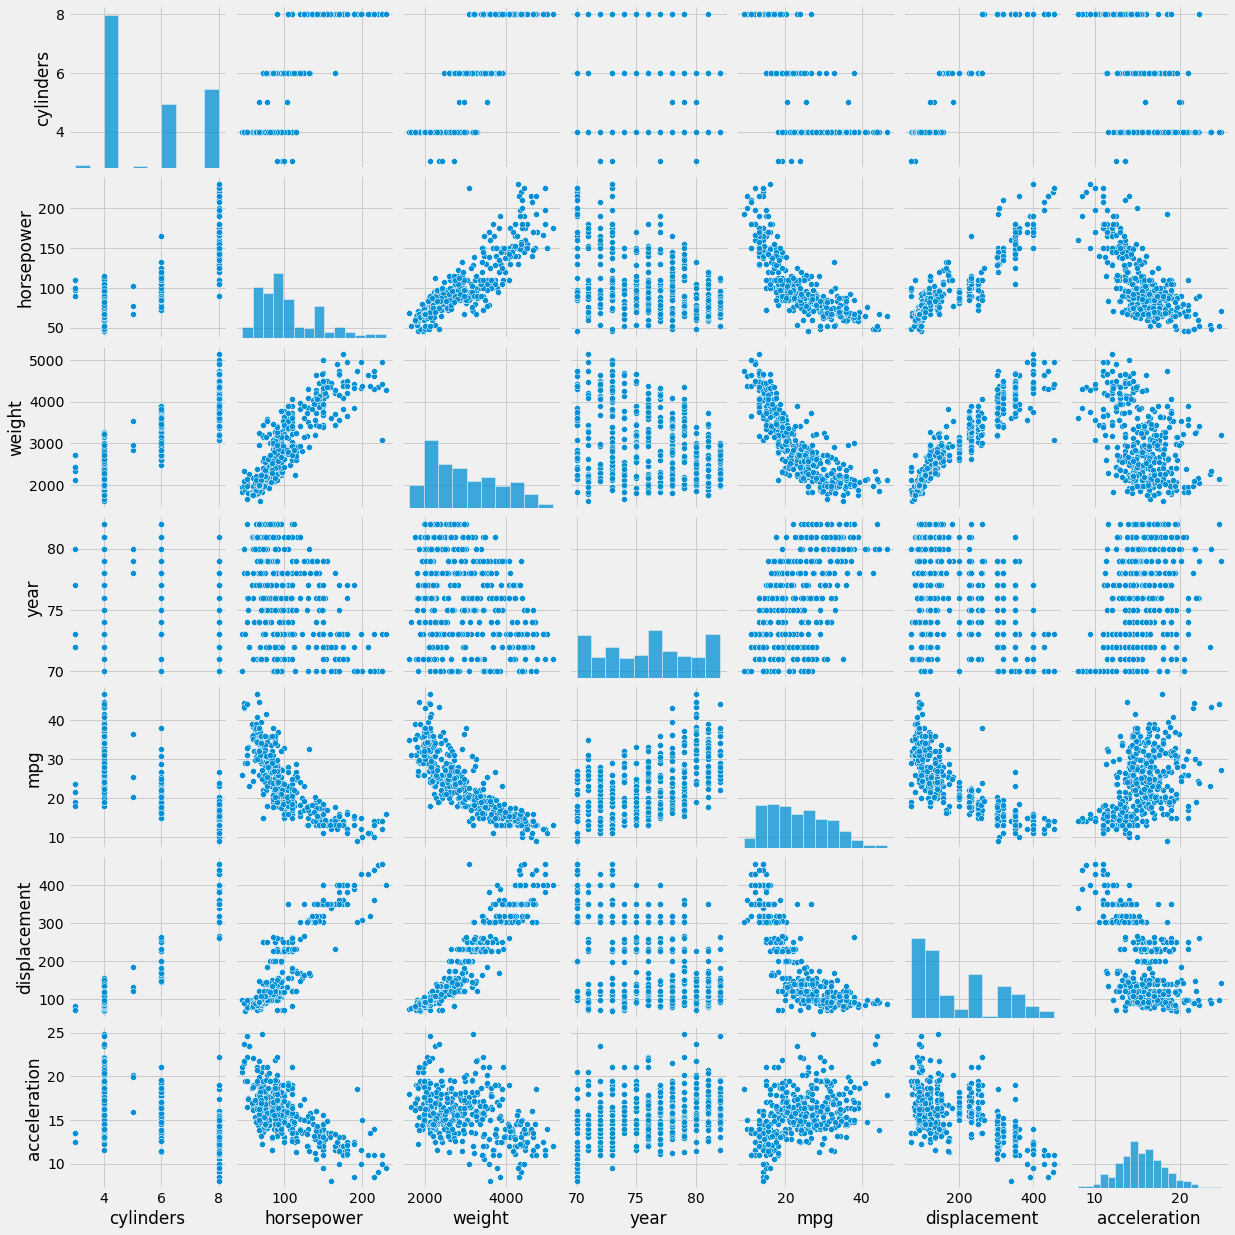

In [24]:
sns.pairplot(df_auto[quant])

On voit des relations entre les variables :</br>
par exemple, **mpg** a une `très forte relation linéaire negative` avec **horsepower, weight, displacement**</br>
Ce qui signifie que **mpg croit** les **autres decroient**

**mpg** a une `correlation positive` avec **year** : les nouveaux modeles ont tendance à avoir plus de **mpg** que les anciens</br>
**mpg** a une `correlation negative` avec **cylinders** : plus un vehicule a de **cylinders** et moins il a de **mpg**

**mpg** semble avoir des relations avec tous les predicteurs

### Exercice 10

In [25]:
cd C:\Users\david\STATISTIQUES\Introduction to Statistical Learning\data

C:\Users\david\STATISTIQUES\Introduction to Statistical Learning\data


In [26]:
pwd

'C:\\Users\\david\\STATISTIQUES\\Introduction to Statistical Learning\\data'

In [27]:
df_boston = pd.read_csv('boston.csv')
df_boston.head()

crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

    black  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2

In [29]:
df_boston.shape

(506, 14)

In [32]:
df_boston.age.max()

100.0

**crim** : taux de criminalité par habitant par ville</br>
**zn** : proportion des zones residentielles > 25.000 square feet</br>
**indus** : proportion de commerces de gros(industrie)</br>
**chas** : Charles River dummy variable (= 1 si proche de la rivière; 0 sinon).</br>
**nox** : proportion en oxyde d'azote(NO/NO2) en part de 10 millions</br>
**rm** : nombre moyen de chambre par logement</br>
**age** : proportion des occupants des logements construit avant 1940</br>
**dis** : moyenne des distances des 5 centres d'emploi de Boston</br>
**rad** : index d'accessibilité aux autoroutes</br>
**tax** : taux de la taxe foncière par tranche de 10.000 dollars </br>
**ptratio** : ratio du nombre de professeurs par ville</br>
**black** : 1000(Bk - 0.63)^2 ou Bk est la proportion de blacks par ville.</br>
**lstat** : pourcentage de pauvreté de la population</br>
**medv** : valeur median des maisons par tranche de 1000$

Il y a 506 observations qui correspondent aux banlieux ou villes</br>
il y a 14 colonnes de predicteurs

**Are any of the predictors associated with per capita crime rate?**</br>
**If so, explain the relationship.**

In [37]:
df_boston.corr()[(df_boston.corr() < -0.5) | (df_boston.corr() > 0.5)]

crim        zn     indus  chas       nox        rm       age  \
crim     1.000000       NaN       NaN   NaN       NaN       NaN       NaN   
zn            NaN  1.000000 -0.533828   NaN -0.516604       NaN -0.569537   
indus         NaN -0.533828  1.000000   NaN  0.763651       NaN  0.644779   
chas          NaN       NaN       NaN   1.0       NaN       NaN       NaN   
nox           NaN -0.516604  0.763651   NaN  1.000000       NaN  0.731470   
rm            NaN       NaN       NaN   NaN       NaN  1.000000       NaN   
age           NaN -0.569537  0.644779   NaN  0.731470       NaN  1.000000   
dis           NaN  0.664408 -0.708027   NaN -0.769230       NaN -0.747881   
rad      0.625505       NaN  0.595129   NaN  0.611441       NaN       NaN   
tax      0.582764       NaN  0.720760   NaN  0.668023       NaN  0.506456   
ptratio       NaN       NaN       NaN   NaN       NaN       NaN       NaN   
black         NaN       NaN       NaN   NaN       NaN       NaN       NaN   
lstat         NaN       NaN  0.603800   NaN  0.590879 -0.613808  0.602339   
medv          NaN       NaN       NaN   NaN       NaN  0.695360       NaN   

              dis       rad       tax   ptratio  black     lstat      medv  
crim          NaN  0.625505  0.582764       NaN    NaN       NaN       NaN  
zn       0.664408       NaN       NaN       NaN    NaN       NaN       NaN  
indus   -0.708027  0.595129  0.720760       NaN    NaN  0.603800       NaN  
chas          NaN       NaN       NaN       NaN    NaN       NaN       NaN  
nox     -0.769230  0.611441  0.668023       NaN    NaN  0.590879       NaN  
rm            NaN       NaN       NaN       NaN    NaN -0.613808  0.695360  
age     -0.747881       NaN  0.506456       NaN    NaN  0.602339       NaN  
dis      1.000000       NaN -0.534432       NaN    NaN       NaN       NaN  
rad           NaN  1.000000  0.910228       NaN    NaN       NaN       NaN  
tax     -0.534432  0.910228  1.000000       NaN    NaN  0.543993       NaN  
ptratio       NaN       NaN       NaN  1.000000    NaN       NaN -0.507787  
black         NaN       NaN       NaN       NaN    1.0       NaN       NaN  
lstat         NaN       NaN  0.543993       NaN    NaN  1.000000 -0.737663  
medv          NaN       NaN       NaN -0.507787    NaN -0.737663  1.000000

**crim** a une légère correlation positive(>0.5) avec **rad** et **tax**</br>
La criminalité est corrélée avec la densité de population ==> **rad** peut être représentative de cette densité car proche des autoroutes </br>
Tax rate est souvent élevée lorsqu'on est proche du centre-ville, donc qui a une densité de population plus élevée.</br>
On peut quand même inclure **lstat** qui correspond aux % de personnes a faible revenu qui ont un taux de criminalité supérieur car vivant dans des endroits ou la population est plus dense (moins de superficie)

**Do any of the census tracts of Boston appear to have particularly high crime rates? Tax rates? Pupil-teacher ratios?**</br>
**Comment on the range of each predictor.**

In [42]:
df_boston.idxmax(axis = 0)

crim       380
zn          57
indus      488
chas       142
nox        142
rm         364
age          8
dis        353
rad        356
tax        488
ptratio    354
black        0
lstat      374
medv       161
dtype: int64

In [45]:
df_boston.iloc[df_boston.idxmax().unique(), :]

crim     zn  indus  chas    nox     rm    age      dis  rad  tax  \
380  88.97620    0.0  18.10     0  0.671  6.968   91.9   1.4165   24  666   
57    0.01432  100.0   1.32     0  0.411  6.816   40.5   8.3248    5  256   
488   0.15086    0.0  27.74     0  0.609  5.454   92.7   1.8209    4  711   
142   3.32105    0.0  19.58     1  0.871  5.403  100.0   1.3216    5  403   
364   3.47428    0.0  18.10     1  0.718  8.780   82.9   1.9047   24  666   
8     0.21124   12.5   7.87     0  0.524  5.631  100.0   6.0821    5  311   
353   0.01709   90.0   2.02     0  0.410  6.728   36.1  12.1265    5  187   
356   8.98296    0.0  18.10     1  0.770  6.212   97.4   2.1222   24  666   
354   0.04301   80.0   1.91     0  0.413  5.663   21.9  10.5857    4  334   
0     0.00632   18.0   2.31     0  0.538  6.575   65.2   4.0900    1  296   
374  18.49820    0.0  18.10     0  0.668  4.138  100.0   1.1370   24  666   
161   1.46336    0.0  19.58     0  0.605  7.489   90.8   1.9709    5  403   

     ptratio   black  lstat  medv  
380     20.2  396.90  17.21  10.4  
57      15.1  392.90   3.95  31.6  
488     20.1  395.09  18.06  15.2  
142     14.7  396.90  26.82  13.4  
364     20.2  354.55   5.29  21.9  
8       15.2  386.63  29.93  16.5  
353     17.0  384.46   4.50  30.1  
356     20.2  377.73  17.60  17.8  
354     22.0  382.80   8.05  18.2  
0       15.3  396.90   4.98  24.0  
374     20.2  396.90  37.97  13.8  
161     14.7  374.43   1.73  50.0

In [48]:
df_boston.loc[df_boston.idxmax().unique()].style.highlight_max()

In [61]:
(df_boston['rad'] == 24).sum(), (df_boston['black'] == 396.9).sum(), (df_boston['ptratio'] == 22).sum()

(132, 121, 2)

Text(0.5, 1.0, 'crimes / minorité ethnique')

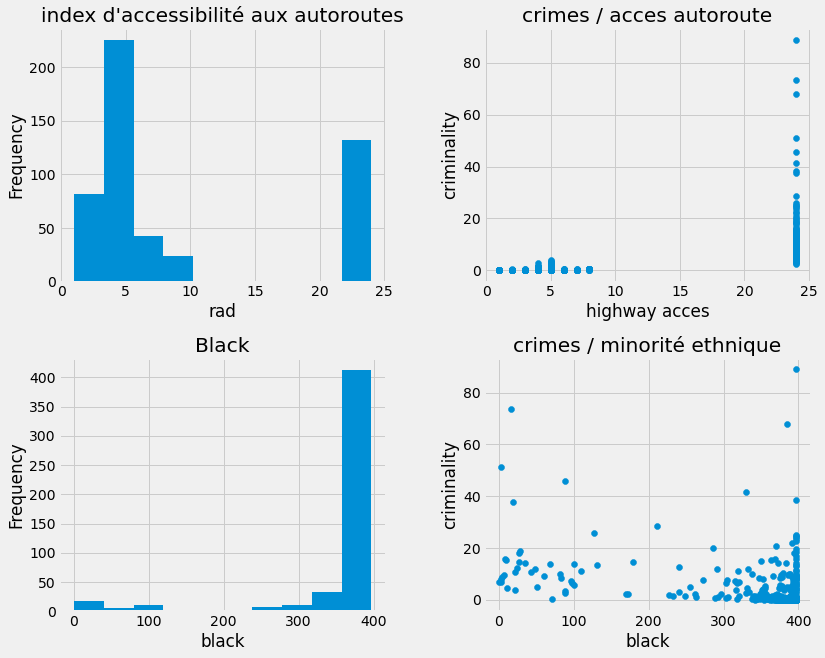

In [74]:
fig, ax = plt.subplots(2, 2, figsize =(12,10))
plt.gcf().subplots_adjust(wspace = 0.3, hspace = 0.3)

ax[0,0].hist(df_boston['rad'])
ax[0,0].set_xlabel('rad')
ax[0,0].set_ylabel('Frequency')
ax[0,0].set_title("index d'accessibilité aux autoroutes")

ax[0,1].scatter(df_boston['rad'], df_boston['crim'])
ax[0,1].set_xlabel('highway acces')
ax[0,1].set_ylabel('criminality')
ax[0,1].set_title("crimes / acces autoroute")

ax[1,0].hist(df_boston['black'])
ax[1,0].set_xlabel('black')
ax[1,0].set_ylabel('Frequency')
ax[1,0].set_title("Black")

ax[1,1].scatter(df_boston['black'], df_boston['crim'])
ax[1,1].set_xlabel('black')
ax[1,1].set_ylabel('criminality')
ax[1,1].set_title("crimes / minorité ethnique")

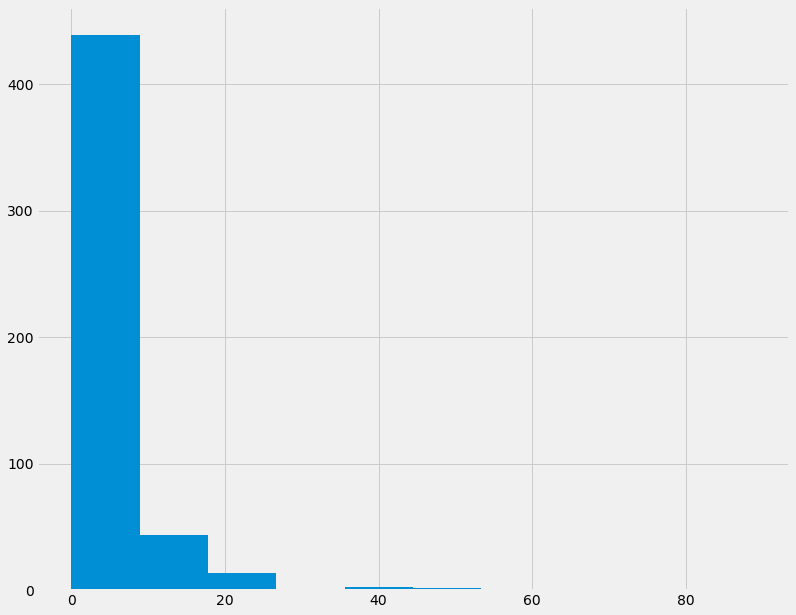

In [79]:
plt.figure(figsize = (12, 10))
plt.hist(df_boston['crim']);

**How many of the census tracts in this data set bound the Charles river?**

In [80]:
df_boston['chas'][df_boston['chas'] == 1].sum()

35

In [81]:
df_boston['chas'].sum()

35

**What is the median pupil-teacher ratio among the towns in this data set?**

In [82]:
df_boston['ptratio'].median()

19.05

**Quel secteur de recensement de Boston a la valeur mediane la plus basse des maisons occupées par leur propriétaire ?**</br>
**Quelles sont les valeurs des autres prédicteurs pour ce secteur de recensement, et comment ces valeurs se comparent-elles aux plages globales de ces prédicteurs ?** </br>
**Commentez vos découvertes.**

**medv** : valeur median des maisons par tranche de 1000$

In [86]:
df_boston.loc[df_boston['medv'].idxmin()]

crim        38.3518
zn           0.0000
indus       18.1000
chas         0.0000
nox          0.6930
rm           5.4530
age        100.0000
dis          1.4896
rad         24.0000
tax        666.0000
ptratio     20.2000
black      396.9000
lstat       30.5900
medv         5.0000
Name: 398, dtype: float64

In [87]:
# lstat : 30.59
df_boston['lstat'].min(), df_boston['lstat'].max()

(1.73, 37.97)

In [88]:
# ptratio : 20.20
df_boston['ptratio'].min(), df_boston['ptratio'].max()

(12.6, 22.0)

In [91]:
round(df_boston['lstat'].std() + df_boston['lstat'].mean(), 2)

19.79

`lstat` > 1 std pour l'endroit ou les maisons sont les moins chers

In [92]:
round(df_boston['ptratio'].std() + df_boston['ptratio'].mean(), 2)

20.62

`ptratio` presque > 1 std pour l'endroit ou les maisons sont les moins chers

In [95]:
round(3*df_boston['crim'].std() + df_boston['crim'].mean(), 2)

29.42

`crim` > 3 std ==> crime anormalement élevé à l'endroit ou les maisons sont les moins chers

Text(0.5, 1.0, 'Criminalité en fonction de la valeur mediane des habitations')

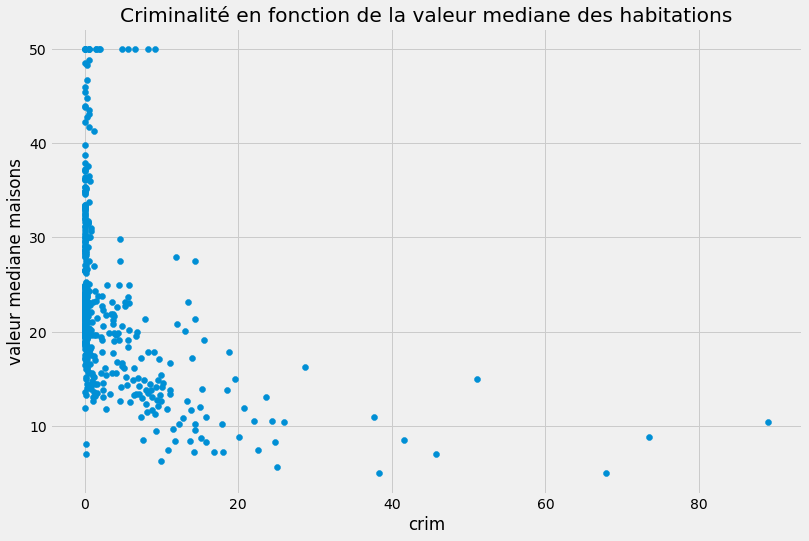

In [105]:
plt.figure(figsize=(12,8))
plt.scatter(df_boston['crim'], df_boston['medv'])
plt.xlabel('crim')
plt.ylabel('valeur mediane maisons')
plt.title('Criminalité en fonction de la valeur mediane des habitations')

**In this data set, how many of the census tracts average more than seven rooms per dwelling?</br>
More than eight rooms per dwelling? </br>
Comment on the census tracts that average more than eight rooms per dwelling**

In [107]:
(df_boston['rm'] > 7).sum(), (df_boston['rm'] > 8).sum()

(64, 13)

In [112]:
sup_8_bedrooms = df_boston[df_boston['rm'] > 8].describe().loc['50%']
inf_8_bedrooms = df_boston[df_boston['rm'] <= 8].describe().loc['50%']

pd.DataFrame({'Plus que 8 chambres' : sup_8_bedrooms,
              '8 chambres ou moins' : inf_8_bedrooms})

Plus que 8 chambres  8 chambres ou moins
crim                 0.52014              0.24522
zn                   0.00000              0.00000
indus                6.20000              9.69000
chas                 0.00000              0.00000
nox                  0.50700              0.53800
rm                   8.29700              6.18500
age                 78.30000             77.30000
dis                  2.89440              3.21570
rad                  7.00000              5.00000
tax                307.00000            334.00000
ptratio             17.40000             19.10000
black              386.86000            391.83000
lstat                4.14000             11.65000
medv                48.30000             21.00000

La plupart des prédicteurs sont similaires dans les deux groupes, à l'exception de la criminalité et de la valeur médiane des maisons - ces 2 valeurs font le double pour plus de 8 pièces.